# A. Enunciado de la práctica

## 1. Objetivos de la práctica
El desarrollo de esta práctica pretende que el alumnado analice, diseñe e implemente soluciones a un problema usando las técnicas de computación evolutiva impartidas en la asignatura Inteligencia Artificial (IA). Para ello, el alumnado desarrollará de forma grupal (por cuartetos) un proyecto de programación en lenguaje Python mediante el uso del entorno de programación Google Colab y cuadernos de Python.

## 2. Caso de estudio
Se pretende resolver un problema de planificación de horarios para un grupo de los grados comunes de la E.T.S. de Ingeniería de Sistemas Informáticos. El problema de planificación de horarios consiste en distribuir $N$ asignaturas, cada una con un número $h_i$ de horas semanales, en un horario de $M$ días con $k$ horas por día, asegurando que se cumplan las siguientes restricciones:

* Cada hora de cada asignatura se debe impartir en un día y hora diferente, i.e. no puede haber solapamiento de horas.
* No se pueden impartir más de 2 horas de la misma asignatura el mismo día.

El objetivo es encontrar una planificación de horarios que tenga en cuenta las siguientes preferencias:

* Se desea que el horario sea lo más continuo posible, i.e. que no haya huecos vacíos al día entre asignatura y asignatura, o que este sea mínimo.
* Se desea que el horario sea lo más compacto posible, i.e. que se utilicen el menor número de días posibles.
* Se desea que si una asignatura imparte más de una hora al día, estas horas sean consecutivas.

Por ejemplo, si tenemos $N=3$ asignaturas (IA, ALG y BD) con las siguientes horas semanales: $h_1 = 1$, $h_2 = 2$ y $h_3 = 3$, y un horario de $M=3$ días con $k=3$ horas por día, una posible planificación sería:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  |  ALG   | BD     |       |
| Hora 2  |  ALG   | BD     |       |
| Hora 3  |  BD    | IA     |       |

Esta planificación cumple las restricciones, ya que no hay solapamiento de horas y no se imparten más de 2 horas de la misma asignatura el mismo día. Además, la solución es óptima ya que cumple todas las preferencias: no hay huecos entre asignaturas, el número de días es el menor posible y las horas de las asignaturas que se imparten más de una vez al día son consecutivas.

La siguiente solución sería válida, pero no óptima:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  |  IA    | BD     | ALG   |
| Hora 2  |        |        |       |
| Hora 3  |  BD    | BD     | ALG   |

Se puede apreciar que hay huecos entre asignaturas, que el número de días no es lo menor posible y que las horas de las asignaturas que se imparten más de una vez al día no son consecutivas.

Finalmente, se muestra un ejemplo de solución no válida:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  | IA/ALG | BD     |       |
| Hora 2  |  ALG   | BD     |       |
| Hora 3  |        | BD     |       |

Se puede apreciar que hay solapamiento de horas y que se imparten más de 2 horas de la misma asignatura el mismo día.

Para resolver este problema, se propone el uso de un algoritmo genético. El algoritmo genético deberá ser capaz de generar una población inicial de soluciones, evaluar la calidad de cada solución, seleccionar las mejores soluciones, cruzarlas y mutarlas para generar una nueva población de soluciones. El algoritmo deberá ser capaz de encontrar una solución óptima (o cercana al óptimo en los casos más complejos) en un tiempo razonable.

## 3. Desarrollo
El desarrollo de esta práctica supone completar este cuaderno de python para resolver el problema para varias configuraciones diferentes usando algoritmos genéticos. Además, usando este cuaderno de python, se quieren mostrar resultados de la ejecución de los algoritmos para extraer conclusiones sobre las configuraciones del problema. También se desea hacer una comparativa entre los algoritmos genéticos propuestos, las distintas representaciones propuestas, los distintos operadores y parámetros de configuración de los algoritmos genéticos, etc.

### 3.1 Primera aproximación

Como primera aproximación, se desarrollará un algoritmo genético para resolver el problema usando la siguiente representación y función de fitness:

* **Representación**: Cada solución será un array de tamaño $h_1 + h_2 + \ldots + h_N$ con alfabeto valores enteros en el rango $\Omega = [0, M \times k - 1]$. Cada valor del array representará la hora (con el correspondiente día) en la que se imparte cada hora de la asignatura $i$, i.e. si $sol_{i_0} = j$, la primera hora de la asignatura $i$ se imparte en el día $j // k$ y en la hora $j \% k$. E.g. en el ejemplo 1 del enunciado, la solución sería $sol = [5, 0, 1, 2, 3, 4]$.
* **Función de fitness**: La función de fitness se define mediante la siguiente fórmula:

$$ fitness(sol) = \left\{ \begin{array}{ll} 0 & \text{si } C_1 > 0 \; || \; C_2 > 0 \\ \\ \frac{1}{1+ P_1 + P_2 + P_3} & \text{en otro caso} \end{array} \right. $$

  donde:

* $C_1 =$ Número de solapamientos entre asignaturas. E.g. en el ejemplo 3 del enunciado, $C_1 = 1$. Si hubiera tres asignaturas a la vez en una misma hora, se consideraría un solapamiento de 2; si hubiera cuatro asignaturas a la vez en una misma hora, se consideraría un solapamiento de 3, etc.
* $C_2 =$ Número de horas por encima de 2 de una misma asignatura impartidas el mismo día. E.g. en el ejemplo 3 del enunciado, $C_2 = 1$.
* $P_1 =$ Número de huecos vacíos entre asignaturas. E.g. en el ejemplo 2 del enunciado, $P_1 = 3$. Si hubiera dos huecos entre asignaturas, se consideraría un hueco de 2; si hubiera tres huecos entre asignaturas, se consideraría un hueco de 3, etc.
* $P_2 =$ Número de días utilizados en los horarios. E.g. en el ejemplo 1 del enunciado, $P_2 = 2$.
* $P_3 =$ Número de asignaturas con horas NO consecutivas en un mismo día. E.g. en el ejemplo 2 del enunciado, $P_3 = 2$.

Utilizando la representación y función de fitness propuestas, se aplicará el algoritmo genético utilizando las siguiente configuración:
* **Población inicial**: $pop_{size}=50$ soluciones aleatorias.
* **Selección**: Selección por torneo con $T=2$.
* **Cruce**: Cruce de un punto con probabilidad $P_{cruce}=0.8$.
* **Mutación**: Mutación uniforme con probabilidad $P_{mut}=0.1$.
* **Selección ambiental (nueva población)**: Reemplazo generacional sin elitismo.
* **Criterio de parada**: Número de generaciones $n_{gens}=50$.

### 3.2 Aproximación final propuesta

Se deberá proponer una o varias aproximaciones finales para resolver el problema de planificación de horarios. Estas aproximaciones deberán ser diferentes a la propuesta en la primera aproximación y deberán justificarse adecuadamente. Para cada aproximación se deberá proponer e implementar:
* **Representación**: Se puede proponer una representación diferente a la propuesta en la primera aproximación. Se deberá justificar adecuadamente la elección de la representación.
* **Función de fitness**: Se puede proponer una función de fitness diferente a la propuesta en la primera aproximación. Se deberá justificar adecuadamente la elección de la función de fitness.
* **Operadores genéticos**: Se pueden proponer operadores genéticos (selección, cruce y mutación) diferentes a los propuestos en la primera aproximación. Se deberá justificar adecuadamente la elección de los operadores genéticos. También se puede proponer una selección ambiental diferente que mejore la convergencia del algoritmo (e.g. usar elitismo).
* **Configuración del algoritmo genético**: Se pueden proponer parámetros de configuración diferentes a los propuestos en la primera aproximación (probabilidades, $pop_{size}$, etc), así como proponer un criterio de parada diferente que mejore la convergencia del algoritmo (e.g. parar cuando la fitness se estanque). En ningún caso, $pop_{size}$ ni $n_{gens}$ podrán ser superiores a 100. Se deberá justificar adecuadamente la elección de los parámetros de configuración.

### Experimentación

Dada la naturaleza estocástica de los algoritmos genéticos, cada aproximación (con cada configuración que se pruebe) deberá ser evaluada al menos 31 veces con distintos números aleatorios (semillas). Para cada aproximación, se deberá proporcionar una tabla comparativa entre la primera aproximación y las aproximaciones finales propuestas. Se deberá hacer un análisis estadístico de los resultados obtenidos obteniendo la media y desviación estándar de las 31 ejecuciones tanto para los distintos indicadores de calidad (C1, C2, P1, P2, P3) de la mejor solución encontrada en cada ejecución, como para los tiempos de ejecución y el número de generación en el cual ha parado la ejecución.

En cada aproximación, se deberá mostrar gráficamente la evolución de la fitness de la mejor solución y de la media de la población en cada generación para la peor ejecución, la mejor ejecución y la ejecución media. Además, se deberá mostrar la mejor solución encontrada en cada una de estas tres ejecuciones.

Para cada aproximación propuesta se debe proporcionar una tabla de estas características (Puede usarse un generador de tablas https://www.tablesgenerator.com/markdown_tables o pandas https://pandas.pydata.org/docs/user_guide/index.html):

| Dataset | Algoritmo | Tiempo(s)   | Generaciones | C1        | C2        | P1        | P2        | P3        |
|---------|-----------|-------------|--------------|-----------|-----------|-----------|-----------|-----------|
|   1     |  Primero  | $10\pm 3.5$ | $50\pm 0$    | $1\pm 1$  | $2\pm 1$  | $1\pm 2$  | $3\pm 1$  | $2\pm 1$  |
|   1     |  Final 1  | $5 \pm 1.2$ | $38\pm 12$   | $0\pm 0$  | $0\pm 0$  | $0\pm 1$  | $2\pm 1$  | $0\pm 1$  |
|   2     |  Final 1  | $25\pm 2.3$ | $73\pm 22$   | $0\pm 0$  | $0\pm 1$  | $1\pm 1$  | $3\pm 0$  | $1\pm 1$  |

## 4. Normativa de la práctica
Para el desarrollo del proyecto de programación se proporciona este cuaderno que sirve a modo de proyecto de programación. Se han propuesto varias configuraciones de horarios para utilizar en las distintas pruebas. Se permiten crear todas las funciones adicionales que sea necesario siempre y cuando se respete la estructura general de este cuaderno. Este cuaderno es el único entregable, por tanto desarrollar código fuera de él no es recomendable.

Además de explicar las decisiones tomadas, será necesario realizar una comparativa de resultados en una o varias tablas, así como incluir una comparativa final.

La práctica debe realizarse teniendo en cuenta la siguiente normativa:
* NO está permitido alterar los nombres, parámetros ni tipo de retorno de ninguno de los métodos proporcionados. El método modificado se evaluará como 0 así como todos los métodos que dependan de él.
* No está permitido el uso de librerías externas excepto numpy y pandas. El uso de librerías externas hará que se evalúe la práctica como 0.
* La práctica se realizará de forma grupal (grupos de 4 alumnos). Cada grupo deberá desarrollar de manera independiente su propia práctica y realizar su propia entrega.
* El plagio de la práctica queda estrictamente prohibido. La detección de plagio supondrá una calificación de 0 en la convocatoria de la asignatura para todos los alumnos implicados, así como la posibilidad de apertura de expediente académico disciplinar.
* Para ser evaluado de la práctica es obligatorio entregarla en plazo, habiendo realizado correctamente al menos una funcionalidad de las pedidas. Una entrega fuera de plazo será evaluada como 0.
* Usa este cuaderno a modo de memoria, justificando las decisiones que tomes a lo largo del proceso de desarrollo. El desarrollo en texto puntúa de cara a la nota de la práctica.
* De cara a la entrega es estrictamente necesario entregar el cuaderno ejecutado al completo. Una entrega que no haya sido ejecutada con éxito hasta la última celda será evaluada como 0. (Entregad el archivo .ipynb)
* Se debe comentar el código adecuadamente. Este apartado es puntuable.

# Cuerpo de la práctica
Usa las siguientes celdas para desarrollar todo el código pedido. Recuerda respetar esta estructura general y añadir celdas siempre dentro de cada apartado.

# Primera Aproximación

## Representación y función de fitness

### Representación

In [ ]:
# Ejemplo de dataset de entrada para el problema de asignación de horarios
import random
dataset = {"n_courses" : 3,
           "n_days" : 3,
           "n_hours_day" : 3,
           "courses" : [("IA", 1), ("ALG", 2), ("BD", 3)]}
dataset2 = {"n_courses" : 4,
           "n_days" : 3,
           "n_hours_day" : 4,
           "courses" : [("IA", 1), ("ALG", 2), ("BD", 3),("POO",2)]}
dataset6 = {"n_courses" : 11,
            "n_days" : 5,
            "n_hours_day" : 12,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4), ("FP", 4), ("TP", 2), ("FC", 4), ("TSO", 2), ("AM", 4), ("LMD", 4)]}

In [ ]:

def generate_random_array_int(alphabet, length):
    # Genera un array de enteros aleatorios de tamaño length
    # usando el alfabeto dado
    min = alphabet[0]
    max = alphabet[-1]

    vector =[random.randint(min,max) for _ in range(length)] #geerar valores alfabeto
    return vector #individuo

def generate_initial_population_timetabling(pop_size, *args, **kwargs):
    dataset = kwargs['dataset']
    # Obtener el alfabeto y la longitud a partir del dataset
    M = dataset['n_days']
    k = dataset['n_hours_day']
    courses =  dataset['courses']
    alphabet = [0,M*k-1]
    length = sum(h for _, h in courses) #horas totales de todas asginaturas

    # Genera una población inicial de tamaño pop_size
    poblacion_inicial = []
    for _ in range(pop_size):
       poblacion_inicial.append(generate_random_array_int(alphabet, length))
    return poblacion_inicial




In [ ]:
################################# NO TOCAR #################################
#                                                                          #
def print_timetabling_solution(solution, dataset):
    # Imprime una solución de timetabling
    n_days = dataset['n_days']
    n_hours_day = dataset['n_hours_day']
    courses = dataset['courses']

    # Crea una matriz de n_days x n_hours_day
    timetable = [[[] for _ in range(n_hours_day)] for _ in range(n_days)]

    # Llena la matriz con las asignaturas
    i = 0
    max_len = 6 # Longitud del título Día XX
    for course in courses:
        for _ in range(course[1]):
            day = solution[i] // n_hours_day
            hour = solution[i] % n_hours_day
            timetable[day][hour].append(course[0])
            i += 1
            # Calcula la longitud máxima del nombre de las asignaturas
            # en una misma franja horaria
            max_len = max(max_len, len('/'.join(timetable[day][hour])))

    # Imprime la matriz con formato de tabla markdown
    print('|         |', end='')
    for i in range(n_days):
        print(f' Día {i+1:<2}{" "*(max_len-6)} |', end='')
    print()
    print('|---------|', end='')
    for i in range(n_days):
        print(f'-{"-"*max_len}-|', end='')
    print()
    for j in range(n_hours_day):
        print(f'| Hora {j+1:<2} |', end='')
        for i in range(n_days):
            s = '/'.join(timetable[i][j])
            print(f' {s}{" "*(max_len-len(s))}', end=' |')
        print()
#                                                                          #
################################# NO TOCAR #################################

In [ ]:
# Ejemplo de uso de la función generar individuo con el dataset de ejemplo

candidate = generate_initial_population_timetabling(3, dataset = dataset6)
print_timetabling_solution(candidate[1], dataset=dataset6)

|         | Día 1      | Día 2      | Día 3      | Día 4      | Día 5      |
|---------|------------|------------|------------|------------|------------|
| Hora 1  | AM         | TP         | ALG        |            | POO/FC     |
| Hora 2  |            |            | AC         |            | FC         |
| Hora 3  |            |            |            | ALG/AC     | IA         |
| Hora 4  |            |            |            |            | FP         |
| Hora 5  | AC         |            |            |            |            |
| Hora 6  | BD         | BD/BD/FC   | LMD        | BD         | AC/TP      |
| Hora 7  |            |            | AM         | TSO        | POO        |
| Hora 8  | BD         | ALG        | FC         |            | ALG/BD     |
| Hora 9  |            | POO/AM/LMD | AM         |            | LMD        |
| Hora 10 | FP         |            |            | POO        | TSO/LMD    |
| Hora 11 | FP         | FP         |            |            | IA         |

### Función de fitness

In [ ]:
from os import dup
def calculate_c1(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    k = dataset['n_hours_day']
    solapamiento = 0;
    for i in range(0,len(solution)): #recorre el indiiduo
       dia = solution[i]//k
       hora = solution[i]%k
       for j in range(i+1,len(solution)): #si hay asiganturas que se repiten en ese dia y hora
          if(dia == solution[j]//k and hora == solution[j]%k):
              solapamiento+=1
    # Calcula la cantidad de asignaturas que se imparten en mismas franjas horarias

    return solapamiento

def calcular_dias_repes_asignatura(datos_asignatura,k):
  #te registra si una asignatura se imparte mas de una hora al dia
  datos = datos_asignatura.copy()
  datos.sort()
  c2=0
  repe = 1
  aux= datos[0]
  for j in range(1,len(datos)): # 5 5 6
    if(datos[j]//k == aux//k):
      repe+=1
      j+=1
    else:
        aux=datos[j]
        j+=1
        if(repe >2):
          c2+= (repe-2)#repes en el dia sobrepasa las 2h
          repe = 1
  return c2



def calculate_c2(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    k= dataset['n_hours_day']
    # Calcula la cantidad de horas por encima de 2 que se imparten
    # de una misma asignatura en un mismo día

    i = j = c2= 0
    while i<len(solution) and j<len(dataset['courses']):
      h_asignatura = dataset['courses'][j][1]

      if(h_asignatura > 2): #si la asignatura no se imparte mas de 2h a la semana
        asignatura = solution[i:i+h_asignatura]
        c2 += calcular_dias_repes_asignatura(asignatura,k)

      j= j+1
      i+=h_asignatura
    return c2

def calculate_p1(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula el número de huecos vacíos entre asignaturas
    k= dataset['n_hours_day']
    m= dataset['n_days']
    horas = [0]*(k*m) #arrray horario
    for z in range(0,len(solution)):
      d = solution[z] // k
      h= solution[z] % k
      horas[d*k + h] = 1

    ini = fin = -1; #indices no inicializados
    i=0;
    j=len(horas)-1
    while i<j and j>i and ini==-1 and fin==-1: #si no tienes la primera asignatura del dia ni la final
      if(ini == -1 and horas[i]==1):
          ini=i;
      if(fin == -1 and horas[j] == 1):
          fin = j;
      i+=1;
      j-=1;
    huecos = 0

    #cuentas los 0s que hay
    for idx in range(ini,(fin+ini)):
      if(horas[idx] == 0): #cuantos huecos en ese tramo
        huecos +=1;

    return huecos

def calculate_p2(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula el número de días utilizados en los horarios
    k=dataset['n_hours_day']
    m=dataset['n_days']
    dias = []

    for i in range(0,len(solution)):
      if((solution[i]//k) not in dias ):
        dias.append(solution[i]//k);


    return len(dias)

def duplicados(asignatura,k): #mejora de la funcion repes, ahora sin contar horas. Solo copias del elemento
    encontrados = set()
    duplicados = []

    for e in asignatura:
        e//=k
        if e in encontrados:
            duplicados.append(e)
        else:
            encontrados.add(e)

    return duplicados #te devuelve el num copias de un elemento, no el total

def calculate_p3(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    k=dataset['n_hours_day']
    # Calcula el número de asignaturas con horas NO consecutivas en un mismo día
    ###que las horas de las asignaturas que se imparten más de una vez al día no son consecutivas.
    p3 = i = j = 0
    for j in range(0,len(dataset['courses'])):
      h_asignatura = dataset['courses'][j][1]

      if(h_asignatura >= 2):#riesgo de no consecutivo
        dias_asignatura = solution[i:i+h_asignatura]

        dia_duplicados = duplicados(dias_asignatura,k) #dias duplicados
        if len(dia_duplicados) != 0:
          for dia in dia_duplicados:

              horas = [solution[x] for x in range(i, i + h_asignatura) if solution[x] // k == dia]
              horas.sort()
              for h in range(0,len(horas)-1):
                if horas[h]+1 !=  horas[h+1] and horas[h] != horas[h+1] :
                  p3+=1

      i+=h_asignatura

    return p3

def fitness_timetabling(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula el fitness de una solución de timetabling siguiendo la fórmula del enunciado
    c1 = calculate_c1(solution, dataset = dataset)
    c2 = calculate_c2(solution,dataset = dataset)
    if(c1 > 0 or c2 > 0):
      resultado =0
    else:
      #print("solution --> ",solution)
      p1 = calculate_p1(solution, dataset = dataset)
      #print("p1",p1)
      p2 = calculate_p2(solution, dataset = dataset)
      #print("p2",p2)
      p3 = calculate_p3(solution, dataset = dataset)
      #print("p3",p3)
      resultado = 1/(p1+p2+p3+1)
    return resultado

# Pistas:
# - Una función que devuelva la tabla de horarios de una solución
# - Una función que devuelva la cantidad de horas por día de cada asignatura
# - A través de args y kwargs se pueden pasar argumentos adicionales que vayamos a necesitar

In [ ]:
print_timetabling_solution(candidate[1], dataset=dataset6)
print(candidate[1])
print("p1",calculate_p1(candidate[1], dataset = dataset6))
print("p2",calculate_p2(candidate[1], dataset = dataset6))
print("p3",calculate_p1(candidate[1], dataset = dataset6))
fitness_timetabling(candidate[1], dataset=dataset6) # Devuelve la fitness del candidato de ejemplo

|         | Día 1      | Día 2      | Día 3      | Día 4      | Día 5      |
|---------|------------|------------|------------|------------|------------|
| Hora 1  | AM         | TP         | ALG        |            | POO/FC     |
| Hora 2  |            |            | AC         |            | FC         |
| Hora 3  |            |            |            | ALG/AC     | IA         |
| Hora 4  |            |            |            |            | FP         |
| Hora 5  | AC         |            |            |            |            |
| Hora 6  | BD         | BD/BD/FC   | LMD        | BD         | AC/TP      |
| Hora 7  |            |            | AM         | TSO        | POO        |
| Hora 8  | BD         | ALG        | FC         |            | ALG/BD     |
| Hora 9  |            | POO/AM/LMD | AM         |            | LMD        |
| Hora 10 | FP         |            |            | POO        | TSO/LMD    |
| Hora 11 | FP         | FP         |            |            | IA         |

0

## Operadores genéticos

### Selección por torneo

In [ ]:

def elegir_individuo(torneo, fitness):
    fit = []
    for i in torneo:
      fit.append(fitness[i])
    mejor_index = fit.index(max(fit))

    return torneo[mejor_index] #el indice con mejor fitnes en fitness[i]

### este genera number_padres seleccionados por torneo entre t individuos
def tournament_selection(population, fitness, number_parents, *args, **kwargs):
    t = kwargs['tournament_size'] # Tamaño del torneo
    # Selecciona number_parents individuos de la población mediante selección por torneo
    padres = []
    for i in range(0,number_parents):
      torneo = random.sample(range(len(population)), t) #indices no individuos
      #print(torneo)
      padres.append(population[elegir_individuo(torneo,fitness)])

    return padres

### Cruce de un punto

In [ ]:
def one_point_crossover(parent1, parent2, p_cross, *args, **kwargs):
    # Realiza el cruce de dos padres con una probabilidad p_cross

    r = random.random()

    if(p_cross > r):
      r2 = random.randint(0, len(parent1)-1) ##indice de trozo

      hijo1 = parent1[:r2] + parent2[r2:] #se mezcan los padres por ese punto
      hijo2 = parent2[:r2] + parent1[r2:]
    else:
      return parent1.copy(), parent2.copy()
    return hijo1, hijo2


In [ ]:
hijo1,hijo2 = one_point_crossover(candidate[0], candidate[1], 0.7)
print_timetabling_solution( hijo1, dataset = dataset6)

print_timetabling_solution( hijo2, dataset = dataset6)

|         | Día 1       | Día 2       | Día 3       | Día 4       | Día 5       |
|---------|-------------|-------------|-------------|-------------|-------------|
| Hora 1  | AM          | POO/TP      |             |             | FC          |
| Hora 2  |             |             |             | POO         | FC          |
| Hora 3  |             |             |             | POO         |             |
| Hora 4  |             | BD          |             |             | FP          |
| Hora 5  |             |             |             |             |             |
| Hora 6  |             | FC          | LMD         | BD          | AC/TP       |
| Hora 7  | BD          |             | AM          | TSO         | BD          |
| Hora 8  | IA/AC       |             | FC          |             | ALG         |
| Hora 9  |             | AM/LMD      | AM          |             | LMD         |
| Hora 10 | FP          |             | BD          |             | ALG/TSO/LMD |
| Hora 11 | BD/A

### Mutación uniforme

In [ ]:
def uniform_mutation(chromosome, p_mut, *args, **kwargs):
    dataset = kwargs['dataset'] # Dataset con la misma estructura que el ejemplo
    M = dataset['n_days']
    k = dataset['n_hours_day']
    # Realiza la mutación gen a gen con una probabilidad p_mut
    # Obtener el alfabeto del dataset para aplicar la mutación

    for i in range(0,len(chromosome)):
      if random.random() < p_mut:
       # print(randoms[i])

        chromosome[i] = random.randint(0,M*k-1)
   # print(chromosome)
    return chromosome

In [ ]:
hijo1_m = uniform_mutation(hijo1,0.1,dataset = dataset2)
print_timetabling_solution( hijo1_m, dataset = dataset6)

|         | Día 1       | Día 2       | Día 3       | Día 4       | Día 5       |
|---------|-------------|-------------|-------------|-------------|-------------|
| Hora 1  | AM/AM       | POO/TP      |             |             | FC          |
| Hora 2  |             |             |             | POO         | FC          |
| Hora 3  |             |             |             | POO         |             |
| Hora 4  |             | BD          |             |             | FP          |
| Hora 5  |             |             |             |             |             |
| Hora 6  | ALG         |             | LMD         | BD          | AC/TP       |
| Hora 7  | ALG/BD      |             | AM          | TSO         | BD          |
| Hora 8  | IA/AC       |             | FC          |             |             |
| Hora 9  |             | AM/LMD      |             |             | LMD         |
| Hora 10 | FP          |             | BD          |             | ALG/TSO/LMD |
| Hora 11 | BD/A

### Selección ambiental (reemplazo generacional)

In [ ]:
# offspring es la seleccion de todos los hijos generados
#fitness-offspring es el resultado de fitness(offspring)
def generational_replacement(population, fitness, offspring, fitness_offspring, *args, **kwargs):
    # Realiza la sustitución generacional de la población
    # Debe devolver tanto la nueva población como el fitness de la misma
    nueva_poblacion = offspring[:len(population)]  # Los hijos reemplazan a la población original
    fitness = fitness_offspring[:len(population)]


    return nueva_poblacion, fitness

## Algoritmo genético

### Condición de parada (número de generaciones)

In [ ]:

#al ser una condicion de parada que depende de el nmero maximo de generacion a generar, he quitado el fitness, porque no hay elitismo
def generation_stop(generation, *args, **kwargs):
    max_gen=kwargs['max_gen']
    # Comprueba si se cumple el criterio de parada (máximo número de generaciones)

    return generation < max_gen #false si aun quedan por hacer

### Algoritmo genético

In [ ]:
# 1 - Inicializa la población con la función generate_population
    # 2 - Evalúa la población con la función fitness_function
    # 3 - Mientras no se cumpla el criterio de parada stopping_criteria
    # 4 - Selección de padres con la función selection
    # 5 - Cruce de padres mediante la función crossover con probabilidad p_cross
    # 6 - Mutación de los descendientes con la función mutation con probabilidad p_mut
    # 8 - Generación de la nueva población con la función environmental_selection
     # 7 - Evaluación de los descendientes
# Aplica un algoritmo genético a un problema de maximización
    # Crea la población de individuos de tamaño pop_size


def genetic_algorithm(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
                      selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    dataset = kwargs['dataset']
    population =  generate_population(pop_size, dataset = dataset)
    fitness = [fitness_function(x, dataset=dataset) for x in population]
    # Contiene la evaluación de la población
    best_fitness = [max(fitness)] # Guarda el mejor fitness de cada generación
    mean_fitness = [min(fitness)] # Guarda el fitness medio de cada generación
    generation = 0 # Contador de generaciones


    while stopping_criteria(generation,fitness,max_gen = kwargs['max_gen']):
      offspring = []
      padres = selection(population, fitness, offspring_size, tournament_size = kwargs['tournament_size']) #seleccion_torneo
      for i in range(0,len(padres),2):
        u, v = crossover(padres[i],padres[i+1],p_cross)  #one_point_crossover(parent1, parent2, p_cross)
        offspring.append(mutation(u,p_mut,dataset = dataset))
        offspring.append(mutation(v,p_mut,dataset = dataset))
      fitness_offspring = [fitness_function(x, dataset = dataset) for x in offspring]
      population, fitness = environmental_selection(population,fitness, offspring, fitness_offspring)
      #print("long population", len(population))
      best_fitness.append(max(fitness))
      mean_fitness.append(sum(fitness) / len(fitness))
      generation += 1
    generation
    return population, fitness, generation, best_fitness, mean_fitness

# Aproximación final propuesta
Usa las siguientes celdas para desarrollar la aproximación final propuesta. Elimina aquellas que no apliquen en tu caso.

## Representación y función de fitness propuestas

### Representación(es) propuesta(s)

La representacion del cromosoma es un vector que representa el total de horas diasponibles a la semana = k*M, en el que se indica el id de la asignatura impartida en esa hora, alfabeto = [0,1,2..] Siendo el 0 indicador de que no se imparte ninguna asignatura. No habra solapamiento, los indices se descartan una vez se les asigna un valor.
El dia en el que se obtiene con parte entera de la division del indice del arra entre m dias.

La seleccion de los padres es por ruleta, mutacion por intercambio de genes, la fitness se calcula = 0 si c1>0; 1/p1+p2+p3+1. En seleccion abiental se utiliza reemplazo estacionario, sustituyendo un 70% de los peores padres con los hijos

In [6]:
import random
dataset = {"n_courses" : 3,
           "n_days" : 3,
           "n_hours_day" : 3,
           "courses" : [("IA", 1), ("ALG", 2), ("BD", 3)]}

In [7]:

def generate_random_array_int_aprox(alphabet, length,*args,**kwargs):
    # Genera un array de enteros aleatorios de tamaño length
    # usando el alfabeto dado
    #print("alfabeto", alphabet)
    asignaturas = kwargs['asignaturas']
    vector = [0]*length
    libres = list(range(length))
     ##array de horas totales
    for idx, (_, h) in enumerate(asignaturas):
        pos_asignatura = random.sample(libres, h)
        for p in pos_asignatura:
            vector[p] = alphabet[idx]
            libres.remove(p)


    return vector

def generate_initial_population_aprox(pop_size, *args, **kwargs):
    dataset = kwargs['dataset'] # Dataset con la misma estructura que el ejemplo
    # Obtener el alfabeto y la longitud a partir del dataset
    M = dataset['n_days']
    k = dataset['n_hours_day']
    asignaturas = dataset['courses']
    alphabet = [i+1 for i in range(len(asignaturas ))]
    dataset['alphabet'] = alphabet
    longitud = M*k
    # Genera una población inicial de tamaño pop_size
    poblacion_inicial = []
    for _ in range(pop_size):
       poblacion_inicial.append(generate_random_array_int_aprox(alphabet, longitud, asignaturas = asignaturas))
    return poblacion_inicial



### Función(es) de fitness propuesta(s)

In [5]:

### Coloca aquí tus funciones de fitness propuestas ###
def contar(asignaturas):
  horas = {}
  #print("cueto asignaturas:", asignaturas)
  for hora in asignaturas:
    if hora != 0:
      if hora in horas:
        horas[hora] += 1
      else:
        horas[hora] = 1
  return horas

def calculate_c1_aprox(solution, *args, **kwargs): #c1
    dataset = kwargs['dataset']
    k= dataset['n_hours_day']
    M = dataset['n_days']
    # Calcula la cantidad de horas por encima de 2 que se imparten
    # de una misma asignatura en un mismo día
    c1 = 0

    for d in range(M):
      dia = d * k
      termina = dia+k
      dia_comprobar = solution[dia:termina]
      #print("dia_comprobar", dia_comprobar)
      cuenta_cada_asignatura =contar(dia_comprobar) # mirando las copias de cada una
      for hora in cuenta_cada_asignatura.values(): #he utilizado un diccionario
                                                  #porque se no el registro de las asignatura era tedioso
        #print("hora in cuenta", hora)
        if hora > 2:
          c1+= (hora - 2)
      #print("cuenta_cada_asig", cuenta_cada_asignatura)

    return c1

def calculate_p1_aprox(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula el número de huecos vacíos entre asignaturas
    k = dataset['n_hours_day']
    m = dataset['n_days']
    huecos =dia= 0
    ceros = 0
    inicio = False # si as encontrado un
    fin = False
    for idx in range(len(solution)):
      if(dia != idx//m):
          if(ceros !=0 and fin):
            huecos+=ceros
          dia = idx//m
          idx-=1
      else:
         if solution[idx] == 0:
            if idx != 0 and  idx+1//m != dia:
              if inicio:
                ceros+=1
         else:
            inicio = True
            if( inicio and idx+1//m != dia):
              fin= True
    return huecos

def calculate_p2_aprox(solution, *args, **kwargs):
  m=dataset['n_days']
  dia = []
  for idx,asignatura in enumerate(solution):
    if(asignatura !=0 and idx//m not in dia):
      dia.append(idx//m)
  return len(dia)

def calculate_p3_aprox(solution, *args, **kwargs ):
  k= dataset['n_hours_day']
  m = dataset['n_days']

 #[0,2,2,1,0,3,3,0,3]
  ultima_h = {} #ultim posicion asignatura
  ultimo_d = {} #memoria del dia
  p3= [] # asinaturas que no cumplen

  for a in range(len(solution)):
    dia = a//k
    #print("dia: ",dia)
    if(solution[a] != 0 and solution[a] not in p3):
      if (ultima_h.get(solution[a]) is not None) and (ultimo_d.get(solution[a]) == dia):
        ultima = ultima_h[solution[a]]
        if (a - ultima) != 1:
          p3.append(solution[a])

      ultima_h[solution[a]] = a
      ultimo_d[solution[a]] = dia


  return len(p3)
#### n asignaturas con horas no consecutivas



##caluculo de la fitness
def fitness_timetabling_aprox(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula el fitness de una solución de timetabling siguiendo la fórmula del enunciado
    c1 = calculate_c1_aprox(solution, dataset = dataset) #num de horas por encima de 2
    if(c1 > 0 ):
      resultado =0
    else:
      p1 = calculate_p1_aprox(solution, dataset = dataset)
      #print("p1: huecos vacios",p1)
      p2 = calculate_p2_aprox(solution, dataset = dataset)
      #print("p2: dias en semana",p2)
      p3 = calculate_p3_aprox(solution, dataset = dataset)
      #print("p3: asignaturas no consecutivas",p3)
      resultado = 1/(p1+p2+p3+1)
    return resultado



In [8]:
#####prueba fitness y condiciones y preferencias
dataset2 = {"n_courses" : 4,
            "n_days" : 3,
            "n_hours_day" : 4,
            "courses" : [("IA", 1), ("ALG", 2), ("BD", 3), ("POO", 2)]}
candidatos = generate_initial_population_aprox(3, dataset = dataset2)
print(candidatos)
print(calculate_c1_aprox(candidatos[0],dataset = dataset2))
#fitness_timetabling_aprox(candidatos[0], dataset = dataset)

[[0, 2, 4, 3, 3, 0, 0, 2, 0, 3, 4, 1], [0, 0, 3, 3, 0, 2, 1, 4, 4, 2, 3, 0], [2, 2, 1, 0, 3, 0, 3, 0, 4, 3, 4, 0]]
0


## Operadores genéticos

### Selección

In [9]:
# Coloca aquí tus funciones de selección propuestas ###

###seleccion estandar ruleta de la fortuna
def calcula_pi(fitness_poblacion):
  #genera las probabilidades acumuladas de cada individuo a partir de la fitness
  fitness_global = sum(fitness_poblacion)
  probabilidades =[ x/fitness_global for x in fitness_poblacion]
  prob_acumuladas = []
  acumulado = 0
  for p in probabilidades:
    acumulado+=p
    prob_acumuladas.append(acumulado)

  return prob_acumuladas

def seleccion_ruleta(poblacion, fitness, n_padres, *args, **kwargs): #vector poblacion, vector fitness poblacion
  #fitness_poblacion = [fitness_timetabling_aprox(x,dataset = dataset) for x in poblacion] array de la fitness de cada individuo

  probabilidades_acumuladas = calcula_pi(fitness) #calculas las probabilidades acumuladas por individuo

  seleccion_de_padres= []


  for i in range(n_padres):
    r = random.random()     #entre cero y uno
    encontrado = False
    idx = 0
    while not encontrado and idx < len(probabilidades_acumuladas):
      if probabilidades_acumuladas[idx] >= r:
        encontrado = True
        seleccion_de_padres.append(poblacion[idx])
      idx+=1
      # busca el primer elemento con prob aumulada ≥ r




  return seleccion_de_padres


In [ ]:

#######prueba
#seleccion= seleccion_ruleta(candidatos, fitness_timetabling_aprox, 2, dataset = dataset)
#print(seleccion)

### Cruce

el cruce lo he hecho igualp porque me parece que esta bien con mi representacion de la solucion

In [10]:
# Coloca aquí tus funciones de cruce propuestas ###


def one_point_crossover_aprox(parent1, parent2, p_cross, *args, **kwargs):
    # Realiza el cruce de dos padres con una probabilidad p_cross
    hijo1 = parent1[:]
    hijo2 = parent2[:]
    r = random.random()
    if(p_cross > r):
      r2 = random.randrange(len(parent1)) ##indice de trozo
      hijo1 = parent1[:r2] + parent2[r2:]
      hijo2 = parent2[:r2] + parent1[r2:]
    return hijo1, hijo2


### Mutación

In [11]:
### Coloca aquí tus funciones de mutación propuestas ###

#MUTACIOION  POR INTERCAMBIO
def exchange_mutation(chromosome, p_mut, *args, **kwargs):
    dataset = kwargs['dataset']
    asignaturas = len(dataset['courses'])
    alphabet = [i+1 for i in range(asignaturas)]# Obtener el alfabeto del dataset para aplicar la mutación

    # Realiza la mutación gen a gen con una probabilidad p_mut


    id1, id2 = random.sample(range(len(chromosome)), 2)
    #print(f"randoms: {id1}, {id2}", )
    aux = chromosome[id1]
    chromosome[id1] = chromosome[id2]
    chromosome[id2] = aux
    #print(chromosome)
    return chromosome


### Selección ambiental

Yo iba a sustituir toda la poblacion con un reemplazo generacional. Pero, pensé: mi representacion de las solucion k*m es muy lenta si el tamaño aumenta mucho. Por lo tanto he elegido el estacionario %75 de la poblacion

In [16]:
### Coloca aquí tus funciones de reemplazo propuestas ###

# offspring es el resultado de aplica el cruce y mutacion a toda la poblacion
#fitness-offspring es el resultado de fitness(offspring) fitness de todos los hijos generados
#fitness es el array con los valores q(i) de population
import numpy as np

def replacement(population,porcentaje, fitness, offspring, fitness_offspring, *args, **kwargs):
    # Realiza la sustitución generacional de la población
    # Debe devolver tanto la nueva población como el fitness de la misma

    N = len(population)
    se_sustituyen= int(N * porcentaje) # en reemplazo estacionario se sustituyen un 75 porciento de los padres
    se_queda = (N - se_sustituyen)+1
    nueva_poblacion = []
    fitness_nueva = []
    padres_fitness_ordenados = np.argsort(fitness)[::-1] #0.7 ,0,6 , 0.5 ...

      #reemplazo un % de la poblacion con hijos pongo 3 hijos en la nueva poblacion

    nueva_poblacion.extend(offspring[:se_sustituyen]) #append no que no funciona bien aqui
    fitness_nueva.extend(fitness_offspring[:se_sustituyen])


    for i in padres_fitness_ordenados[:se_queda]: #el resto lo relleno con los 50 - %50
      fitness_nueva.append(fitness[i])
      nueva_poblacion.append(population[i])
      #devulve el padre de la population con el indice que le indica padres ordenados por fitness

    return nueva_poblacion,fitness_nueva


In [15]:
####################################################################probar
#population,porcentaje, fitness, offspring, fitness_offspring

dataset = {"n_courses" : 4,
           "n_days" : 4,
           "n_hours_day" : 4,
           "courses" : [("IA", 1), ("ALG", 2), ("BD", 3), ("AA", 2)]}
candidatos = generate_initial_population_aprox(5, dataset = dataset)
print("poblacion -->", candidatos)
fitness_candidatos = [fitness_timetabling_aprox(x,dataset = dataset) for x in candidatos]
print("fitness -->",fitness_candidatos)
seleccion = seleccion_ruleta(candidatos, fitness_candidatos, 2, dataset = dataset)
print("padres -->",seleccion)
hijos = one_point_crossover_aprox(seleccion[0], seleccion[1], 0.7)
print("hijos --> ",hijos)
mutados = [exchange_mutation(h,0.7,dataset = dataset) for h in hijos]
print("mutados --> ",mutados)
fitness_hijos = [fitness_timetabling_aprox(x,dataset=dataset) for x in mutados]
print("fitness hijos -->",fitness_hijos)
nueva_poblacion = replacement(candidatos,0.7, fitness_candidatos, mutados, fitness_hijos)
print("gen Z ---> ",nueva_poblacion)

poblacion --> [[0, 1, 3, 4, 3, 0, 0, 4, 0, 0, 2, 0, 0, 3, 2, 0], [1, 4, 0, 2, 2, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 4], [0, 3, 0, 4, 1, 0, 2, 3, 0, 0, 4, 0, 3, 0, 0, 2], [0, 0, 3, 0, 1, 0, 2, 3, 2, 4, 0, 0, 0, 3, 0, 4], [0, 4, 3, 0, 3, 0, 0, 3, 1, 2, 0, 0, 2, 4, 0, 0]]
fitness --> [0.09090909090909091, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.06666666666666667]
padres --> [[0, 0, 3, 0, 1, 0, 2, 3, 2, 4, 0, 0, 0, 3, 0, 4], [0, 0, 3, 0, 1, 0, 2, 3, 2, 4, 0, 0, 0, 3, 0, 4]]
hijos -->  ([0, 0, 3, 0, 1, 0, 2, 3, 2, 4, 0, 0, 0, 3, 0, 4], [0, 0, 3, 0, 1, 0, 2, 3, 2, 4, 0, 0, 0, 3, 0, 4])
mutados -->  [[0, 0, 3, 0, 1, 0, 2, 3, 4, 2, 0, 0, 0, 3, 0, 4], [0, 0, 3, 0, 1, 0, 2, 3, 2, 4, 0, 0, 0, 3, 0, 4]]
fitness hijos --> [0.08333333333333333, 0.08333333333333333]
n_p antes de añadir los padres que se quedan [[0, 0, 3, 0, 1, 0, 2, 3, 4, 2, 0, 0, 0, 3, 0, 4], [0, 0, 3, 0, 1, 0, 2, 3, 2, 4, 0, 0, 0, 3, 0, 4]]
[[0, 0, 3, 0, 1, 0, 2, 3, 4, 2, 0, 0, 0, 3, 0, 4], [0, 0, 3, 0, 1, 0, 2,

### Criterio de parada

In [ ]:
# cuando se supere un valor de la fitness especifico

def criterio_de_parada(generaciones,fitness,*args,**kwargs):
  fit = max(fitness)
  if fit > 0.6 or generaciones > kwargs['max_gen'] :
    return False # si se ha superado el num max generaciones o el valor fitness 0.6
  else:
    return True #puede seeguir

## ALGORITMO GENETICO APROX

In [ ]:
def genetic_algorithm_aprox(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
                      selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    dataset = kwargs['dataset']
    population =  generate_population(pop_size, dataset = dataset)
    #print("long inicial population", len(population))
    fitness = [fitness_function(x, dataset=dataset) for x in population]
    # Contiene la evaluación de la población
    best_fitness = [max(fitness)] # Guarda el mejor fitness de cada generación
    mean_fitness = [min(fitness)] # Guarda el fitness medio de cada generación
    generation = 0 # Contador de generaciones


    while stopping_criteria(generation,fitness,max_gen = kwargs['max_gen']):
      offspring = []
      padres = selection(population, fitness, offspring_size)
      for i in range(0,len(padres),2):
        u, v = crossover(padres[i],padres[i+1],p_cross)  #one_point_crossover_aprox(parent1, parent2, p_cross)
        offspring.append(mutation(u,p_mut,dataset = dataset))
        offspring.append(mutation(v,p_mut,dataset = dataset))
      fitness_offspring = [fitness_function(x, dataset = dataset) for x in offspring]
      porcentaje_estacionacrio = kwargs['porcentaje']
      population, fitness = environmental_selection(population,porcentaje_estacionacrio,fitness, offspring, fitness_offspring)

      best_fitness.append(max(fitness))
      mean_fitness.append(sum(fitness) / len(fitness))
      generation += 1
    generation
    return population, fitness, generation, best_fitness, mean_fitness

# Experimentos
Usa la función `run_ga` para extraer resultados.

## Utilidades
Usa estas funciones pre-programadas para ejecutar los experimentos y resumir el código.

### Temporizador

In [ ]:
################################# NO TOCAR #################################
#                                                                          #
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        res = func(*args, **kwargs)
        end = time.time()
        return *res, end - start
    return wrapper
#                                                                          #
################################# NO TOCAR #################################

# Este codigo temporiza la ejecución de una función cualquiera

### Envoltorios

In [ ]:
################################# NO TOCAR #################################
#                                                                          #
@timer
def run_ga(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
           selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    # Además del retorno de la función, se devuelve el tiempo de ejecución en segundos
    return genetic_algorithm(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
                             selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs)
#                                                                          #
################################# NO TOCAR #################################


### Datasets
Configuraciones de horarios para utilizar en las pruebas.

In [ ]:
# Se deben probar los 6 datasets
dataset1 = {"n_courses" : 3,
            "n_days" : 3,
            "n_hours_day" : 3,
            "courses" : [("IA", 1), ("ALG", 2), ("BD", 3)]}

dataset2 = {"n_courses" : 4,
            "n_days" : 3,
            "n_hours_day" : 4,
            "courses" : [("IA", 1), ("ALG", 2), ("BD", 3), ("POO", 2)]}

dataset3 = {"n_courses" : 4,
            "n_days" : 4,
            "n_hours_day" : 4,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4)]}

dataset4 = {"n_courses" : 5,
            "n_days" : 4,
            "n_hours_day" : 6,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4)]}

dataset5 = {"n_courses" : 7,
            "n_days" : 4,
            "n_hours_day" : 8,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4), ("FP", 4), ("TP", 2)]}

dataset6 = {"n_courses" : 11,
            "n_days" : 5,
            "n_hours_day" : 12,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4), ("FP", 4), ("TP", 2), ("FC", 4), ("TSO", 2), ("AM", 4), ("LMD", 4)]}

### Generación de números aleatorios

In [ ]:
import numpy as np
import random

def set_seed(seed):
    # Se debe fijar la semilla usada para generar números aleatorios
    # Con la librería random
    random.seed(seed)
    # Con la librería numpy
    np.random.seed(seed)

### Métricas
Métricas a estudiar en los experimentos.

In [ ]:
################################# NO TOCAR #################################
#                                                                          #
def best_solution(population, fitness):
    # Devuelve la mejor solución de la población
    return population[fitness.index(max(fitness))]

import matplotlib.pyplot as plt
def plot_fitness_evolution(best_fitness, mean_fitness):
    plt.plot(best_fitness, label='Best fitness')
    plt.plot(mean_fitness, label='Mean fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.show()
#                                                                          #
################################# NO TOCAR #################################

### Lanzador de experimentos

In [ ]:
from statistics import mean, median, stdev

def launch_experiment(seeds, dataset, generate_population, pop_size, fitness_function, c1, c2, p1, p2, p3, stopping_criteria,
                      offspring_size, selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    best_individuals = []
    best_inds_c1 = []
    best_inds_c2 = []
    best_inds_p1 = []
    best_inds_p2 = []
    best_inds_p3 = []
    best_inds_fitness = []
    best_fitnesses = []
    mean_fitnesses = []
    last_generations = []
    execution_times = []
    # Ejecutamos el algoritmo con cada semilla
    for seed in seeds:
        print(f"Running Genetic Algorithm with seed {seed}")
        set_seed(seed)
        population, fitness, generation, best_fitness, mean_fitness, execution_time = run_ga(generate_population, pop_size, fitness_function,stopping_criteria,
                                                                                             offspring_size, selection, crossover, p_cross, mutation, p_mut,
                                                                                             environmental_selection, dataset=dataset, *args, **kwargs)
        population, fitness, generation, best_fitness, mean_fitness
        best_individual = best_solution(population, fitness)
        best_ind_c1 = c1(best_individual, dataset=dataset)
        best_ind_c2 = c2(best_individual, dataset=dataset)
        best_ind_p1 = p1(best_individual, dataset=dataset)
        best_ind_p2 = p2(best_individual, dataset=dataset)
        best_ind_p3 = p3(best_individual, dataset=dataset)
        best_ind_fitness = fitness_function(best_individual, dataset=dataset)
        best_individuals.append(best_individual)
        best_inds_c1.append(best_ind_c1)
        best_inds_c2.append(best_ind_c2)
        best_inds_p1.append(best_ind_p1)
        best_inds_p2.append(best_ind_p2)
        best_inds_p3.append(best_ind_p3)
        best_inds_fitness.append(best_ind_fitness)
        best_fitnesses.append(best_fitness)
        mean_fitnesses.append(mean_fitness)
        last_generations.append(generation)
        execution_times.append(execution_time)
    # Imprimimos la media y desviación típica de los resultados obtenidos
    print("Mean Best Fitness: " + str(mean(best_inds_fitness)) + " " + u"\u00B1" + " " + str(stdev(best_inds_fitness)))
    print("Mean C1: " + str(mean(best_inds_c1)) + " " + u"\u00B1" + " " + str(stdev(best_inds_c1)))
    print("Mean C2: " + str(mean(best_inds_c2)) + " " + u"\u00B1" + " " + str(stdev(best_inds_c2)))
    print("Mean P1: " + str(mean(best_inds_p1)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p1)))
    print("Mean P2: " + str(mean(best_inds_p2)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p2)))
    print("Mean P3: " + str(mean(best_inds_p3)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p3)))
    print("Mean Execution Time: " + str(mean(execution_times)) + " " + u"\u00B1" + " " + str(stdev(execution_times)))
    print("Mean Number of Generations: " + str(mean(last_generations)) + " " + u"\u00B1" + " " + str(stdev(last_generations)))
    # Mostramos la evolución de la fitness para la mejor ejecución
    print("Best execution fitness evolution:")
    best_execution = best_inds_fitness.index(max(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[best_execution], mean_fitnesses[best_execution])
    # Mostramos la evolución de la fitness para la ejecución mediana
    print("Median execution fitness evolution:")
    median_execution = best_inds_fitness.index(median(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[median_execution], mean_fitnesses[median_execution])
    # Mostramos la evolución de la fitness para la peor ejecución
    print("Worst execution fitness evolution:")
    worst_execution = best_inds_fitness.index(min(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[worst_execution], mean_fitnesses[worst_execution])

    return best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times

## Ejecuciones
Este espacio de la práctica está reservado a las ejecuciones de los algoritmos. Se recomienda el uso del método launch_experiment.

Running Genetic Algorithm with seed 87684662
Running Genetic Algorithm with seed 87684685
Running Genetic Algorithm with seed 87684708
Running Genetic Algorithm with seed 87684731
Running Genetic Algorithm with seed 87684754
Running Genetic Algorithm with seed 87684777
Running Genetic Algorithm with seed 87684800
Running Genetic Algorithm with seed 87684823
Running Genetic Algorithm with seed 87684846
Running Genetic Algorithm with seed 87684869
Running Genetic Algorithm with seed 87684892
Running Genetic Algorithm with seed 87684915
Running Genetic Algorithm with seed 87684938
Running Genetic Algorithm with seed 87684961
Running Genetic Algorithm with seed 87684984
Running Genetic Algorithm with seed 87685007
Running Genetic Algorithm with seed 87685030
Running Genetic Algorithm with seed 87685053
Running Genetic Algorithm with seed 87685076
Running Genetic Algorithm with seed 87685099
Running Genetic Algorithm with seed 87685122
Running Genetic Algorithm with seed 87685145
Running Ge

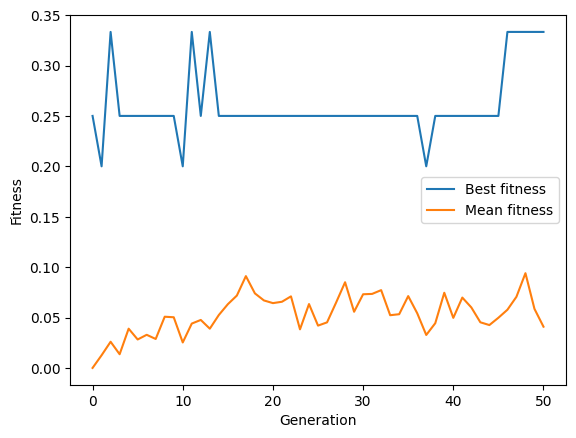

Median execution fitness evolution:


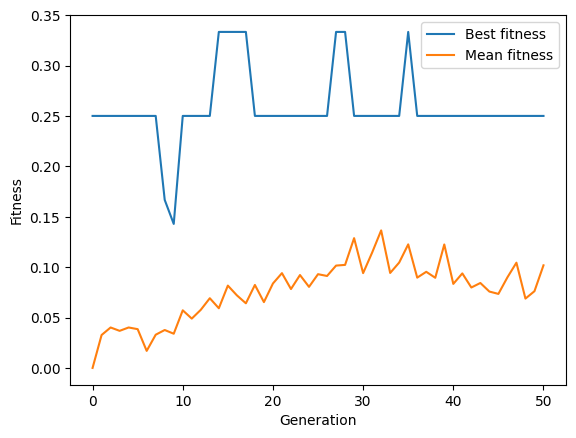

Worst execution fitness evolution:


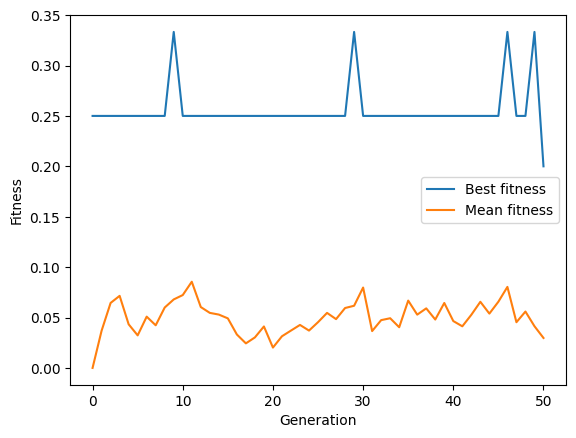

|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     | ALG    |        |
| Hora 2  | ALG    | BD     |        |
| Hora 3  | IA     | BD     |        |


In [ ]:

#dataset1
seeds = [87684662 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran
# Crear un conjunto de 31 semillas para los experimentos

#evaluacion Dataset1 ejecutado31 veces con el algoritmo AproximacionIncial
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment(seeds, dataset1, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
print_timetabling_solution(best_solution(best_individuals, best_inds_fitness),dataset = dataset1)

# Recuerda también mostrar el horario de la mejor solución obtenida en los casos peor, mejor y mediano

### Primera aproximación

Running Genetic Algorithm with seed 87684662
Running Genetic Algorithm with seed 87684685
Running Genetic Algorithm with seed 87684708
Running Genetic Algorithm with seed 87684731
Running Genetic Algorithm with seed 87684754
Running Genetic Algorithm with seed 87684777
Running Genetic Algorithm with seed 87684800
Running Genetic Algorithm with seed 87684823
Running Genetic Algorithm with seed 87684846
Running Genetic Algorithm with seed 87684869
Running Genetic Algorithm with seed 87684892
Running Genetic Algorithm with seed 87684915
Running Genetic Algorithm with seed 87684938
Running Genetic Algorithm with seed 87684961
Running Genetic Algorithm with seed 87684984
Running Genetic Algorithm with seed 87685007
Running Genetic Algorithm with seed 87685030
Running Genetic Algorithm with seed 87685053
Running Genetic Algorithm with seed 87685076
Running Genetic Algorithm with seed 87685099
Running Genetic Algorithm with seed 87685122
Running Genetic Algorithm with seed 87685145
Running Ge

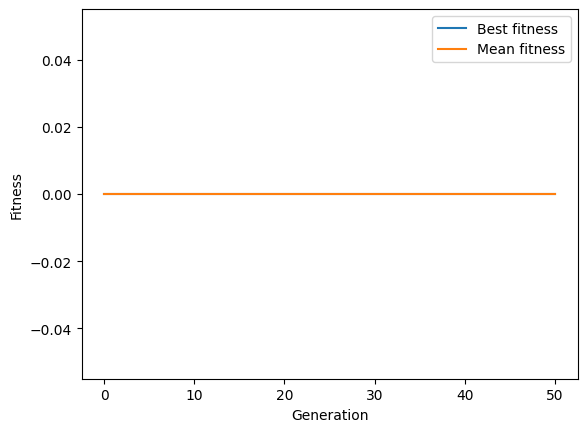

Median execution fitness evolution:


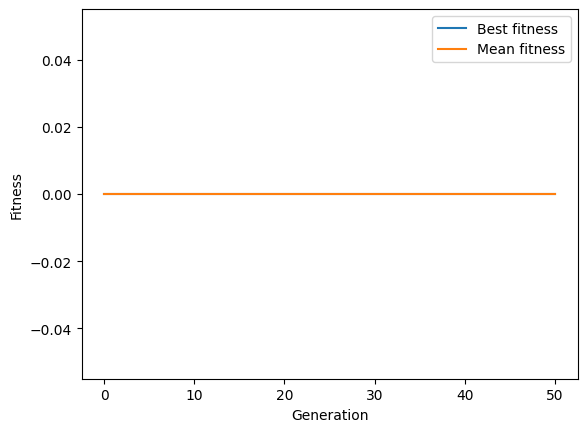

Worst execution fitness evolution:


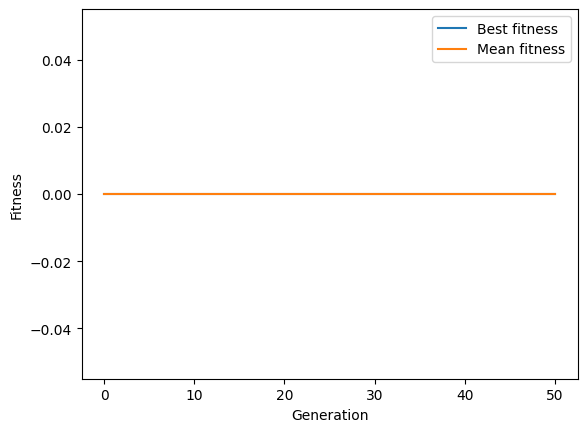

[22, 1, 26, 10, 41, 51, 48, 29, 12, 11, 3, 35, 1, 51, 17, 21, 44, 22, 31, 32, 1, 38, 46, 37, 5, 24, 41, 2, 57, 27, 21, 38, 33, 28, 34, 55, 38, 36, 41, 19]
|         | Día 1      | Día 2      | Día 3      | Día 4      | Día 5      |
|---------|------------|------------|------------|------------|------------|
| Hora 1  |            | BD         | TP         | LMD        | BD         |
| Hora 2  | IA/POO/FP  |            |            | FP         |            |
| Hora 3  | FC         |            | ALG        | FP/TSO/LMD |            |
| Hora 4  | BD         |            | FC         |            | ALG/POO    |
| Hora 5  |            |            | AM         |            |            |
| Hora 6  | TP         | POO        | BD         | ALG/FC/LMD |            |
| Hora 7  |            |            |            |            |            |
| Hora 8  |            | LMD        | AC         |            | AM         |
| Hora 9  |            |            | AC         | AC         |            

In [ ]:
#dataset6
seeds = [87684662 + i*23 for i in range(31)]
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment(seeds,dataset6, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
mejor_individuo = best_solution(best_individuals, best_inds_fitness)
print(mejor_individuo)
print_timetabling_solution(mejor_individuo,dataset = dataset6)

Running Genetic Algorithm with seed 87684662
Running Genetic Algorithm with seed 87684685
Running Genetic Algorithm with seed 87684708
Running Genetic Algorithm with seed 87684731
Running Genetic Algorithm with seed 87684754
Running Genetic Algorithm with seed 87684777
Running Genetic Algorithm with seed 87684800
Running Genetic Algorithm with seed 87684823
Running Genetic Algorithm with seed 87684846
Running Genetic Algorithm with seed 87684869
Running Genetic Algorithm with seed 87684892
Running Genetic Algorithm with seed 87684915
Running Genetic Algorithm with seed 87684938
Running Genetic Algorithm with seed 87684961
Running Genetic Algorithm with seed 87684984
Running Genetic Algorithm with seed 87685007
Running Genetic Algorithm with seed 87685030
Running Genetic Algorithm with seed 87685053
Running Genetic Algorithm with seed 87685076
Running Genetic Algorithm with seed 87685099
Running Genetic Algorithm with seed 87685122
Running Genetic Algorithm with seed 87685145
Running Ge

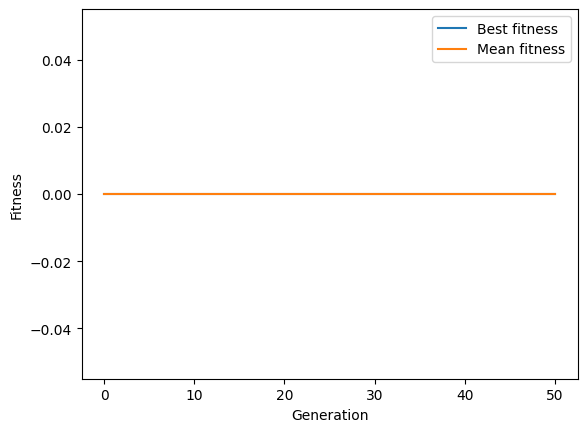

Median execution fitness evolution:


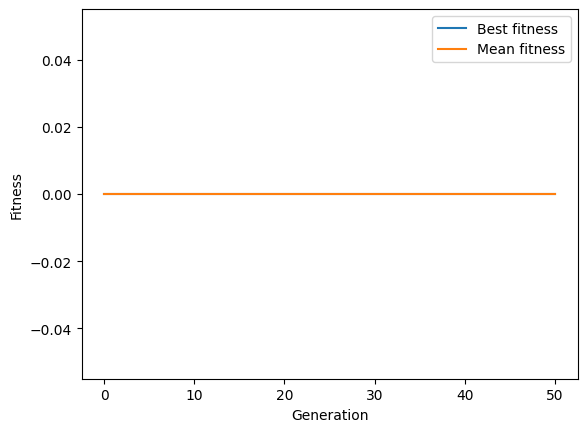

Worst execution fitness evolution:


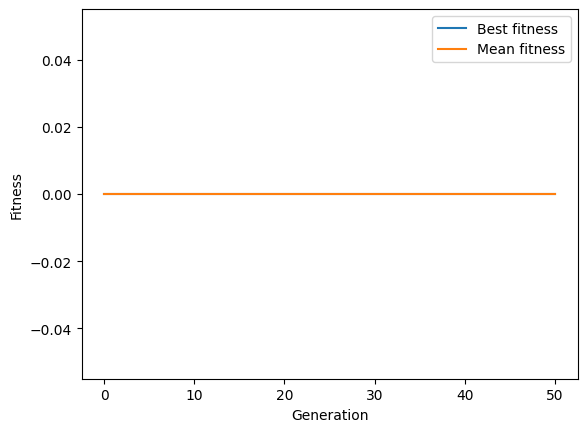

[4, 27, 17, 15, 24, 27, 5, 12, 18, 28, 14, 31, 13, 30, 23, 30, 16, 10, 4, 26, 17, 8, 5, 16, 6, 7]
|         | Día 1   | Día 2   | Día 3   | Día 4   |
|---------|---------|---------|---------|---------|
| Hora 1  |         | FP      | AC/FP   | ALG     |
| Hora 2  |         |         | ALG/FP  |         |
| Hora 3  |         | AC      | BD      | AC      |
| Hora 4  |         |         |         | IA/ALG  |
| Hora 5  | IA/AC   | BD      |         | BD      |
| Hora 6  | BD/FP   | POO     |         |         |
| Hora 7  | TP      | BD      |         | POO/POO |
| Hora 8  | TP      | ALG     | POO     | BD      |


In [ ]:
#dataset5
seeds = [87684662 + i*23 for i in range(31)]
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment(seeds,dataset5, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
mejor_individuo = best_solution(best_individuals, best_inds_fitness)
print(mejor_individuo)
print_timetabling_solution(mejor_individuo,dataset = dataset5)

Running Genetic Algorithm with seed 87684662
Running Genetic Algorithm with seed 87684685
Running Genetic Algorithm with seed 87684708
Running Genetic Algorithm with seed 87684731
Running Genetic Algorithm with seed 87684754
Running Genetic Algorithm with seed 87684777
Running Genetic Algorithm with seed 87684800
Running Genetic Algorithm with seed 87684823
Running Genetic Algorithm with seed 87684846
Running Genetic Algorithm with seed 87684869
Running Genetic Algorithm with seed 87684892
Running Genetic Algorithm with seed 87684915
Running Genetic Algorithm with seed 87684938
Running Genetic Algorithm with seed 87684961
Running Genetic Algorithm with seed 87684984
Running Genetic Algorithm with seed 87685007
Running Genetic Algorithm with seed 87685030
Running Genetic Algorithm with seed 87685053
Running Genetic Algorithm with seed 87685076
Running Genetic Algorithm with seed 87685099
Running Genetic Algorithm with seed 87685122
Running Genetic Algorithm with seed 87685145
Running Ge

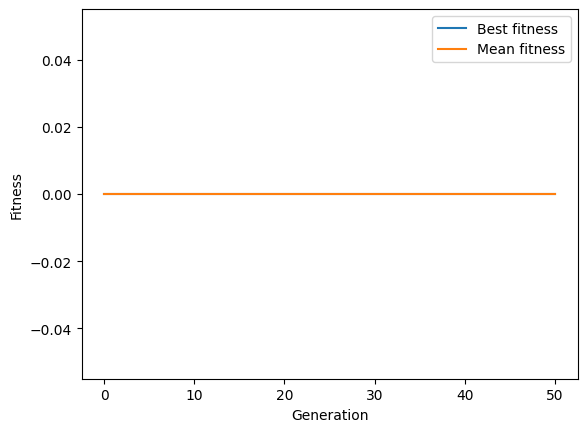

Median execution fitness evolution:


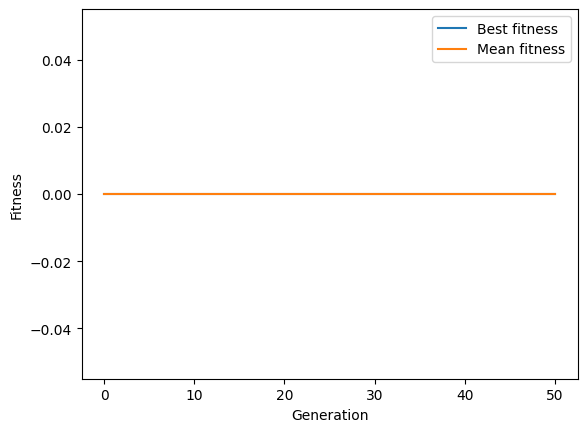

Worst execution fitness evolution:


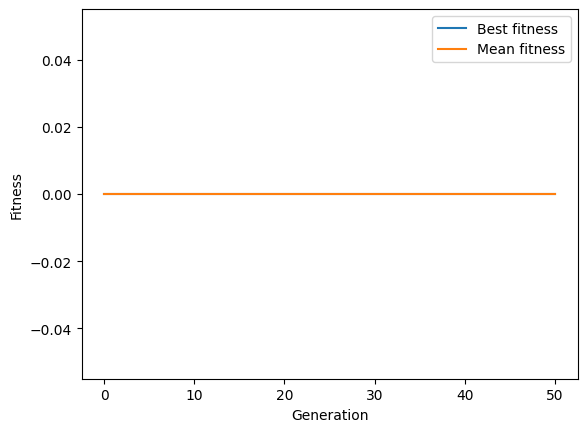

[23, 8, 5, 17, 5, 15, 21, 13, 4, 7, 9, 1, 9, 13, 8, 11, 17, 18, 18, 12]
|         | Día 1   | Día 2   | Día 3   | Día 4   |
|---------|---------|---------|---------|---------|
| Hora 1  |         |         | AC      | AC/AC   |
| Hora 2  | BD      | BD      | BD/POO  |         |
| Hora 3  |         | IA/POO  |         |         |
| Hora 4  |         | BD/POO  | ALG     | BD      |
| Hora 5  | BD      |         |         |         |
| Hora 6  | ALG/ALG | POO     | ALG/AC  | IA      |


In [ ]:
#dataset4
seeds = [87684662 + i*23 for i in range(31)]
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment(seeds,dataset4, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
mejor_individuo = best_solution(best_individuals, best_inds_fitness)
print(mejor_individuo)
print_timetabling_solution(mejor_individuo,dataset = dataset4)

Running Genetic Algorithm with seed 87684662
Running Genetic Algorithm with seed 87684685
Running Genetic Algorithm with seed 87684708
Running Genetic Algorithm with seed 87684731
Running Genetic Algorithm with seed 87684754
Running Genetic Algorithm with seed 87684777
Running Genetic Algorithm with seed 87684800
Running Genetic Algorithm with seed 87684823
Running Genetic Algorithm with seed 87684846
Running Genetic Algorithm with seed 87684869
Running Genetic Algorithm with seed 87684892
Running Genetic Algorithm with seed 87684915
Running Genetic Algorithm with seed 87684938
Running Genetic Algorithm with seed 87684961
Running Genetic Algorithm with seed 87684984
Running Genetic Algorithm with seed 87685007
Running Genetic Algorithm with seed 87685030
Running Genetic Algorithm with seed 87685053
Running Genetic Algorithm with seed 87685076
Running Genetic Algorithm with seed 87685099
Running Genetic Algorithm with seed 87685122
Running Genetic Algorithm with seed 87685145
Running Ge

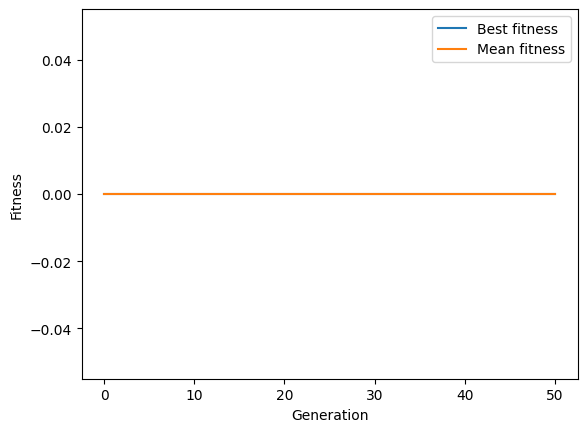

Median execution fitness evolution:


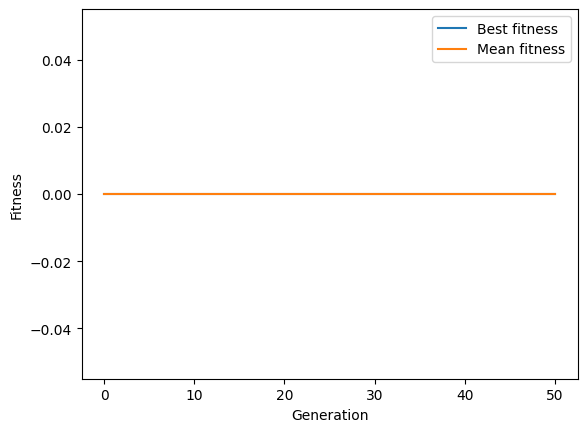

Worst execution fitness evolution:


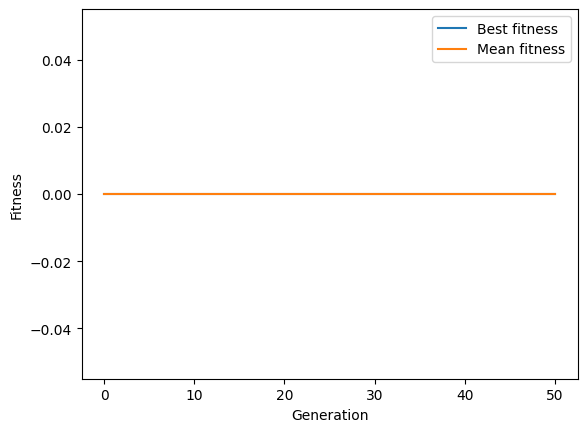

[13, 4, 2, 3, 15, 15, 1, 1, 1, 1, 0, 11, 2, 15, 6, 15]
|         | Día 1           | Día 2           | Día 3           | Día 4           |
|---------|-----------------|-----------------|-----------------|-----------------|
| Hora 1  | BD              | IA              |                 |                 |
| Hora 2  | BD/BD/BD/BD     |                 |                 | IA              |
| Hora 3  | ALG/POO         | POO             |                 |                 |
| Hora 4  | ALG             |                 | BD              | ALG/ALG/POO/POO |


In [ ]:
#datase3
seeds = [87684662 + i*23 for i in range(31)]
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment(seeds,dataset3, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
mejor_individuo = best_solution(best_individuals, best_inds_fitness)
print(mejor_individuo)
print_timetabling_solution(mejor_individuo,dataset = dataset3)

Running Genetic Algorithm with seed 87684662
Running Genetic Algorithm with seed 87684685
Running Genetic Algorithm with seed 87684708
Running Genetic Algorithm with seed 87684731
Running Genetic Algorithm with seed 87684754
Running Genetic Algorithm with seed 87684777
Running Genetic Algorithm with seed 87684800
Running Genetic Algorithm with seed 87684823
Running Genetic Algorithm with seed 87684846
Running Genetic Algorithm with seed 87684869
Running Genetic Algorithm with seed 87684892
Running Genetic Algorithm with seed 87684915
Running Genetic Algorithm with seed 87684938
Running Genetic Algorithm with seed 87684961
Running Genetic Algorithm with seed 87684984
Running Genetic Algorithm with seed 87685007
Running Genetic Algorithm with seed 87685030
Running Genetic Algorithm with seed 87685053
Running Genetic Algorithm with seed 87685076
Running Genetic Algorithm with seed 87685099
Running Genetic Algorithm with seed 87685122
Running Genetic Algorithm with seed 87685145
Running Ge

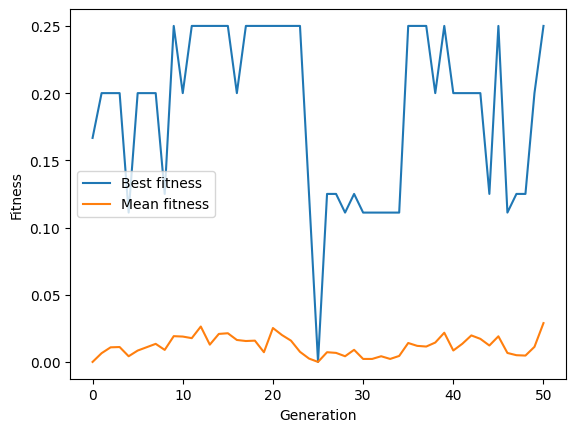

Median execution fitness evolution:


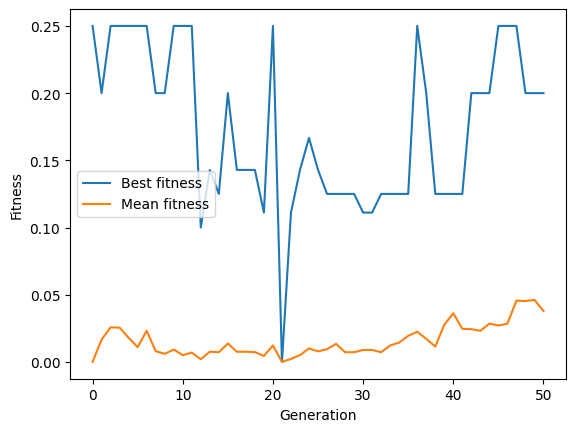

Worst execution fitness evolution:


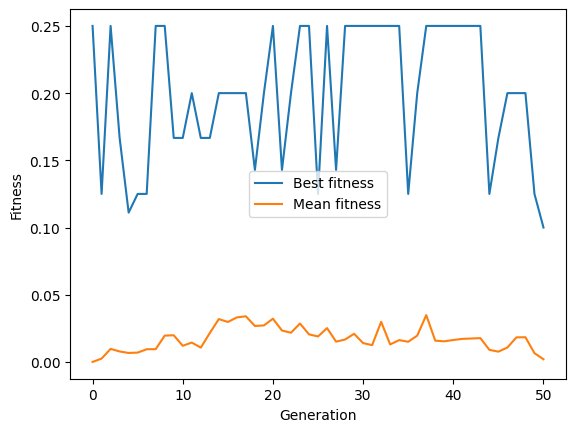

[0, 4, 10, 7, 9, 6, 1, 2]
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | IA     | ALG    |        |
| Hora 2  | POO    |        | BD     |
| Hora 3  | POO    | BD     | ALG    |
| Hora 4  |        | BD     |        |


In [ ]:
#datase2
seeds = [87684662 + i*23 for i in range(31)]
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment(seeds,dataset2, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
mejor_individuo = best_solution(best_individuals, best_inds_fitness)
print(mejor_individuo)
print_timetabling_solution(mejor_individuo,dataset = dataset2)

**Resultados de la Primera Aproximación**

|   | Algoritmo         | generaciones | tiempo                                      | c1                                     | c2                                      | p1                                       | p2                                      | p3                                        | Media de BestFitness                       |
|---|-------------------|--------------|---------------------------------------------|----------------------------------------|-----------------------------------------|------------------------------------------|-----------------------------------------|-------------------------------------------|--------------------------------------------|
| 1 | propuesta inicial | 50 ± 0.0     | 0.4359031415754749 ±  0.07813463371753034   | 0 ± 0.0                                | 0 ±\n 0.0                               | 0.5161290322580645 ±  0.9956896351084336 | 2.967741935483871 ±  0.1796053020267749 | 0.0967741935483871 ±  0.30053715351876426 | 0.22830261136712748  ± 0.04371248491706523 |
| 2 | propuesta inicial | 50 ± 0.0     | 0.032343495276666454 ± 0.003760620880200037 | 0 ± 0.0                                | 0 ± 0.0                                 | 1.2580645161290323 ± 1.7120697403140226  | 3 ± 0.0                                 | 0.22580645161290322 ± 0.49730456257407213 | 0.19965437788018434 ± 0.05536178812084018  |
| 3 | propuesta inicial | 50 ± 0.0     | 0.05805243984345467 ± 0.004424145762335653  | 7.806451612903226 ± 2.0561996472247803 | 0.9354838709677419 ± 0.8138584590688048 | 4.032258064516129 ± 2.601075046562375    | 3.935483870967742 ± 0.24973103811470745 | 1.7419354838709677 ± 1.3896700312300487   | 0 ± 0.0                                    |
| 4 | propuesta inicial | 50 ± 0.0     | 0.07563783276465631 ± 0.004044203007660188  | 7.580645161290323 ± 2.419010728216352  | 1.2903225806451613 ± 0.8243602928775247 | 6.741935483870968 ± 4.5237723339080915   | 4 ± 0.0                                 | 4.612903225806452 ± 2.044136645054805     | 0 ± 0.0                                    |
| 5 | propuesta inicial | 50 ± 0.0     | 0.10519959849696006 ± 0.006154923423506905  | 9.774193548387096 ± 3.283389279584485  | 1.1612903225806452 ± 1.0359142240407226 | 8.935483870967742 ± 6.381930135786862    | 4 ± 0.0                                 | 7.483870967741935 ± 2.6940795304016234    | 0 ± 0.0                                    |
| 6 | propuesta incial  | 50 ± 0.0     | 0.24856518160912297 ± 0.08637221835187556   | 12.870967741935484 ± 3.451974656954779 | 1 ± 0.7302967433402214                  | 21.161290322580644 ± 13.909461466195228  | 5 ± 0.0                                 | 9.870967741935484 ± 2.8837699340027223    | 0 ± 0.0                                    |



**La tabla de resultados y una valoración crítica de los resultados.**

# Aproximaciones Propuestas

In [ ]:
#no funcionaba la funcion genetic_algorithm con mis funciones propuestas,
#se que pone no tocar, pero no me funciona por un error de que uno de los argumentos que uso
# para la propuesta inicial no lo utilizo en esta propuesta final, el torunament size
# y he visto mas facil utilizar la misma funcion con ciertos cambios
                                                                          #
@timer
def run_ga_a(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
           selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    # Además del retorno de la función, se devuelve el tiempo de ejecución en segundos
    return genetic_algorithm_aprox(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
                             selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs)


In [ ]:
from statistics import mean, median, stdev

def launch_experiment_aprox_final(seeds, dataset, generate_population, pop_size, fitness_function, c1, p1, p2, p3, stopping_criteria,
                      offspring_size, selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    best_individuals = []
    best_inds_c1 = []

    best_inds_p1 = []
    best_inds_p2 = []
    best_inds_p3 = []
    best_inds_fitness = []
    best_fitnesses = []
    mean_fitnesses = []
    last_generations = []
    execution_times = []
    # Ejecutamos el algoritmo con cada semilla
    for seed in seeds:
        print(f"Running Genetic Algorithm with seed {seed}")
        set_seed(seed)
        population, fitness, generation, best_fitness, mean_fitness, execution_time = run_ga_a(generate_population, pop_size, fitness_function,stopping_criteria,
                                                                                             offspring_size, selection, crossover, p_cross, mutation, p_mut,
                                                                                             environmental_selection, dataset=dataset, *args, **kwargs)
        population, fitness, generation, best_fitness, mean_fitness
        best_individual = best_solution(population, fitness)
        best_ind_c1 = c1(best_individual, dataset=dataset)

        best_ind_p1 = p1(best_individual, dataset=dataset)
        best_ind_p2 = p2(best_individual, dataset=dataset)
        best_ind_p3 = p3(best_individual, dataset=dataset)
        best_ind_fitness = fitness_function(best_individual, dataset=dataset)
        best_individuals.append(best_individual)
        best_inds_c1.append(best_ind_c1)

        best_inds_p1.append(best_ind_p1)
        best_inds_p2.append(best_ind_p2)
        best_inds_p3.append(best_ind_p3)
        best_inds_fitness.append(best_ind_fitness)
        best_fitnesses.append(best_fitness)
        mean_fitnesses.append(mean_fitness)
        last_generations.append(generation)
        execution_times.append(execution_time)
    # Imprimimos la media y desviación típica de los resultados obtenidos
    print("Mean Best Fitness: " + str(mean(best_inds_fitness)) + " " + u"\u00B1" + " " + str(stdev(best_inds_fitness)))
    print("Mean C1: " + str(mean(best_inds_c1)) + " " + u"\u00B1" + " " + str(stdev(best_inds_c1)))
    #print("Mean C2: " + str(mean(best_inds_c2)) + " " + u"\u00B1" + " " + str(stdev(best_inds_c2)))
    print("Mean P1: " + str(mean(best_inds_p1)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p1)))
    print("Mean P2: " + str(mean(best_inds_p2)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p2)))
    print("Mean P3: " + str(mean(best_inds_p3)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p3)))
    print("Mean Execution Time: " + str(mean(execution_times)) + " " + u"\u00B1" + " " + str(stdev(execution_times)))
    print("Mean Number of Generations: " + str(mean(last_generations)) + " " + u"\u00B1" + " " + str(stdev(last_generations)))
    # Mostramos la evolución de la fitness para la mejor ejecución
    print("Best execution fitness evolution:")
    best_execution = best_inds_fitness.index(max(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[best_execution], mean_fitnesses[best_execution])
    # Mostramos la evolución de la fitness para la ejecución mediana
    print("Median execution fitness evolution:")

    median_execution = best_inds_fitness.index(median(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[median_execution], mean_fitnesses[median_execution])
    # Mostramos la evolución de la fitness para la peor ejecución
    print("Worst execution fitness evolution:")
    worst_execution = best_inds_fitness.index(min(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[worst_execution], mean_fitnesses[worst_execution])

    return best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times

Running Genetic Algorithm with seed 87684662
long inicial population 50
longitud prob acumuladoas [50]
Log population 50
long prob_acumul 50
longitud prob acumuladoas [70]
Log population 70
long prob_acumul 70
longitud prob acumuladoas [98]
Log population 98
long prob_acumul 98
longitud prob acumuladoas [118]
Log population 118
long prob_acumul 118
longitud prob acumuladoas [132]
Log population 132
long prob_acumul 132
longitud prob acumuladoas [142]
Log population 142
long prob_acumul 142
longitud prob acumuladoas [149]
Log population 149
long prob_acumul 149
longitud prob acumuladoas [154]
Log population 154
long prob_acumul 154
longitud prob acumuladoas [157]
Log population 157
long prob_acumul 157
longitud prob acumuladoas [159]
Log population 159
long prob_acumul 159
Running Genetic Algorithm with seed 87684685
long inicial population 50
longitud prob acumuladoas [50]
Log population 50
long prob_acumul 50
longitud prob acumuladoas [70]
Log population 70
long prob_acumul 70
longitu

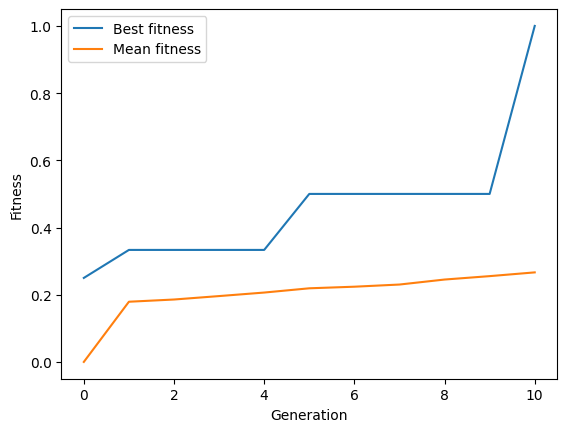

Median execution fitness evolution:


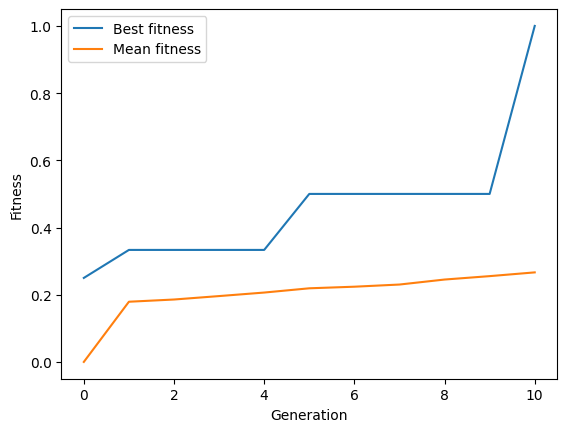

Worst execution fitness evolution:


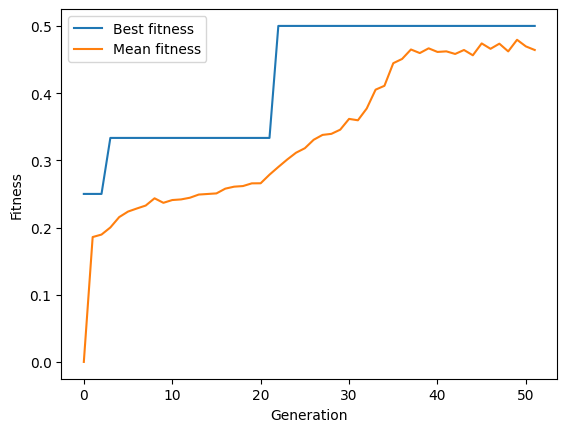

In [ ]:
### Coloca aquí tus experimentos ###
seeds = [87684662 + i*23 for i in range(31)]
#dtaset 1
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment_aprox_final(seeds,dataset1, generate_initial_population_aprox, 50, fitness_timetabling_aprox, calculate_c1_aprox,
                  calculate_p1_aprox, calculate_p2_aprox, calculate_p3_aprox, criterio_de_parada, 50,seleccion_ruleta, one_point_crossover_aprox, 0.7,
                 exchange_mutation, 0.1,replacement, max_gen=50, porcentaje = 0.7)

Running Genetic Algorithm with seed 87684662
longitud prob acumuladoas [50]
Log population 50
long prob_acumul 50
longitud prob acumuladoas [70]
Log population 70
long prob_acumul 70
longitud prob acumuladoas [98]
Log population 98
long prob_acumul 98
longitud prob acumuladoas [118]
Log population 118
long prob_acumul 118
longitud prob acumuladoas [132]
Log population 132
long prob_acumul 132
longitud prob acumuladoas [142]
Log population 142
long prob_acumul 142
longitud prob acumuladoas [149]
Log population 149
long prob_acumul 149
longitud prob acumuladoas [154]
Log population 154
long prob_acumul 154
longitud prob acumuladoas [157]
Log population 157
long prob_acumul 157
longitud prob acumuladoas [159]
Log population 159
long prob_acumul 159
longitud prob acumuladoas [161]
Log population 161
long prob_acumul 161
longitud prob acumuladoas [162]
Log population 162
long prob_acumul 162
longitud prob acumuladoas [163]
Log population 163
long prob_acumul 163
longitud prob acumuladoas [1

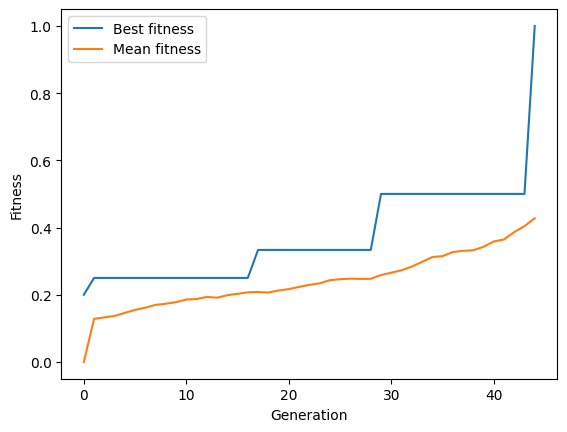

Median execution fitness evolution:


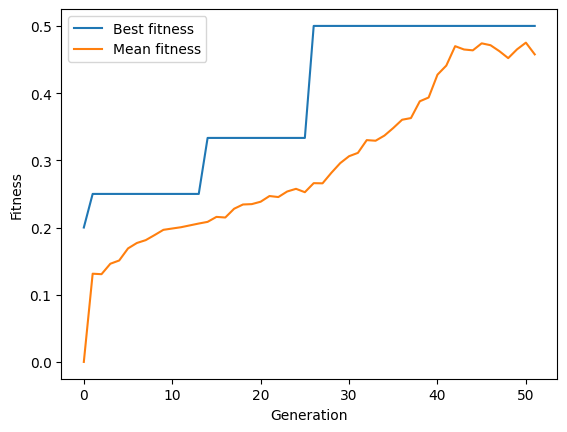

Worst execution fitness evolution:


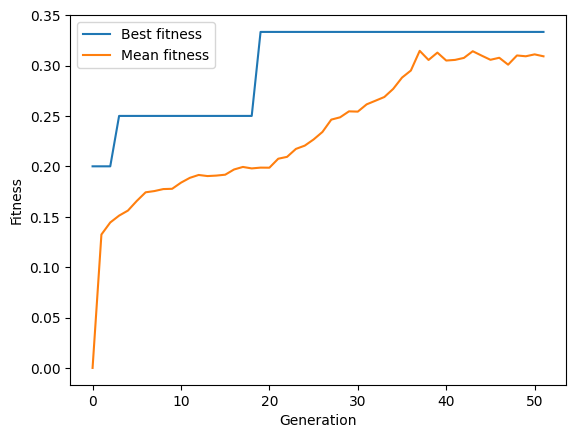

In [ ]:
#dtaset 2
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment_aprox_final(seeds,dataset2, generate_initial_population_aprox, 50, fitness_timetabling_aprox, calculate_c1_aprox,
                  calculate_p1_aprox, calculate_p2_aprox, calculate_p3_aprox, criterio_de_parada, 50,seleccion_ruleta, one_point_crossover_aprox, 0.7,
                 exchange_mutation, 0.1,replacement, max_gen=50, porcentaje = 0.7)

Running Genetic Algorithm with seed 87684662
Running Genetic Algorithm with seed 87684685
Running Genetic Algorithm with seed 87684708
Running Genetic Algorithm with seed 87684731
Running Genetic Algorithm with seed 87684754
Running Genetic Algorithm with seed 87684777
Running Genetic Algorithm with seed 87684800
Running Genetic Algorithm with seed 87684823
Running Genetic Algorithm with seed 87684846
Running Genetic Algorithm with seed 87684869
Running Genetic Algorithm with seed 87684892
Running Genetic Algorithm with seed 87684915
Running Genetic Algorithm with seed 87684938
Running Genetic Algorithm with seed 87684961
Running Genetic Algorithm with seed 87684984
Running Genetic Algorithm with seed 87685007
Running Genetic Algorithm with seed 87685030
Running Genetic Algorithm with seed 87685053
Running Genetic Algorithm with seed 87685076
Running Genetic Algorithm with seed 87685099
Running Genetic Algorithm with seed 87685122
Running Genetic Algorithm with seed 87685145
Running Ge

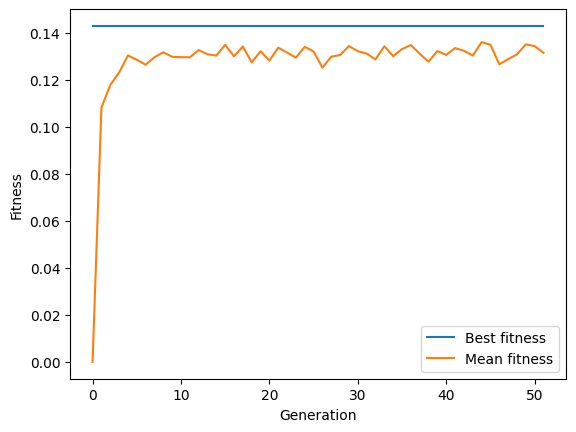

Median execution fitness evolution:


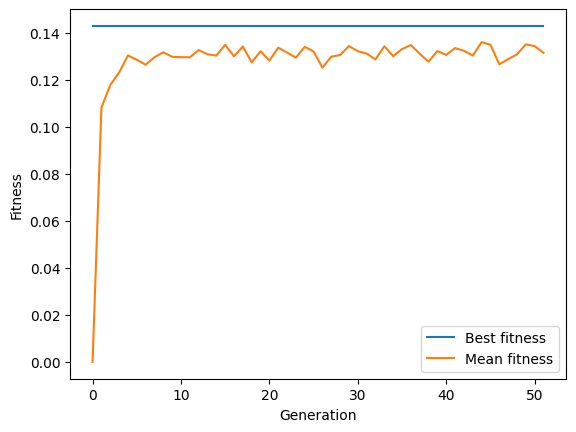

Worst execution fitness evolution:


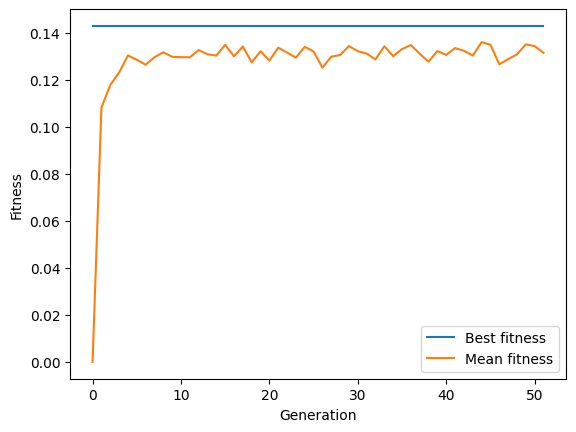

In [ ]:
#dtaset 3
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment_aprox_final(seeds,dataset3, generate_initial_population_aprox, 50, fitness_timetabling_aprox, calculate_c1_aprox,
                  calculate_p1_aprox, calculate_p2_aprox, calculate_p3_aprox, criterio_de_parada, 50,seleccion_ruleta, one_point_crossover_aprox, 0.7,
                 exchange_mutation, 0.1,replacement, max_gen=50, porcentaje = 0.7)

Running Genetic Algorithm with seed 87684662
Running Genetic Algorithm with seed 87684685
Running Genetic Algorithm with seed 87684708
Running Genetic Algorithm with seed 87684731
Running Genetic Algorithm with seed 87684754
Running Genetic Algorithm with seed 87684777
Running Genetic Algorithm with seed 87684800
Running Genetic Algorithm with seed 87684823
Running Genetic Algorithm with seed 87684846
Running Genetic Algorithm with seed 87684869
Running Genetic Algorithm with seed 87684892
Running Genetic Algorithm with seed 87684915
Running Genetic Algorithm with seed 87684938
Running Genetic Algorithm with seed 87684961
Running Genetic Algorithm with seed 87684984
Running Genetic Algorithm with seed 87685007
Running Genetic Algorithm with seed 87685030
Running Genetic Algorithm with seed 87685053
Running Genetic Algorithm with seed 87685076
Running Genetic Algorithm with seed 87685099
Running Genetic Algorithm with seed 87685122
Running Genetic Algorithm with seed 87685145
Running Ge

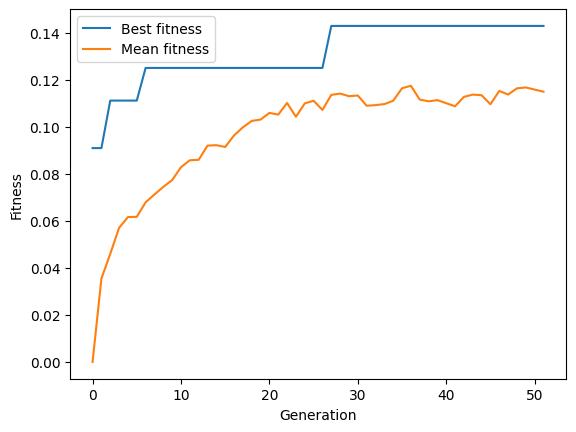

Median execution fitness evolution:


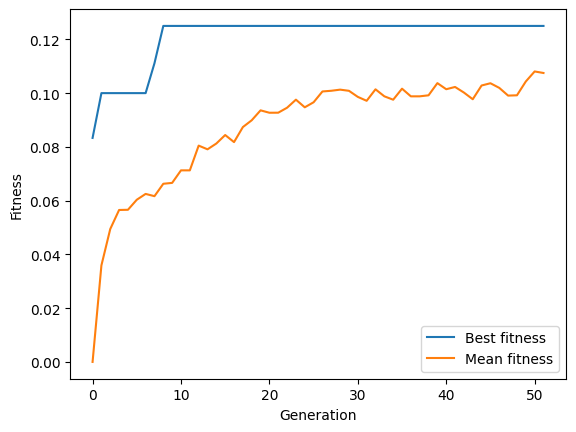

Worst execution fitness evolution:


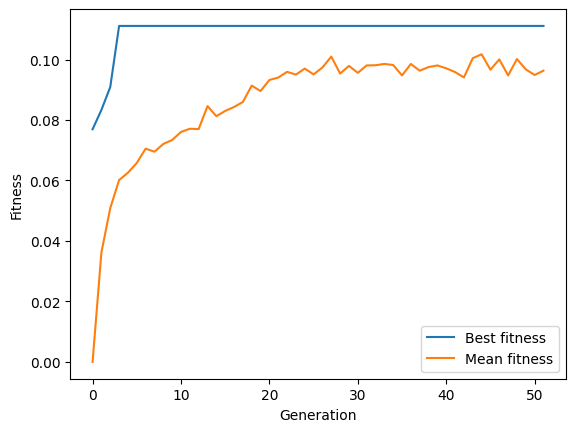

In [ ]:
#dataset4
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment_aprox_final(seeds,dataset4, generate_initial_population_aprox, 50, fitness_timetabling_aprox, calculate_c1_aprox,
                  calculate_p1_aprox, calculate_p2_aprox, calculate_p3_aprox, criterio_de_parada, 50,seleccion_ruleta, one_point_crossover_aprox, 0.7,
                 exchange_mutation, 0.1,replacement, max_gen=50, porcentaje = 0.7)

Running Genetic Algorithm with seed 87684662
Running Genetic Algorithm with seed 87684685
Running Genetic Algorithm with seed 87684708
Running Genetic Algorithm with seed 87684731
Running Genetic Algorithm with seed 87684754
Running Genetic Algorithm with seed 87684777
Running Genetic Algorithm with seed 87684800
Running Genetic Algorithm with seed 87684823
Running Genetic Algorithm with seed 87684846
Running Genetic Algorithm with seed 87684869
Running Genetic Algorithm with seed 87684892
Running Genetic Algorithm with seed 87684915
Running Genetic Algorithm with seed 87684938
Running Genetic Algorithm with seed 87684961
Running Genetic Algorithm with seed 87684984
Running Genetic Algorithm with seed 87685007
Running Genetic Algorithm with seed 87685030
Running Genetic Algorithm with seed 87685053
Running Genetic Algorithm with seed 87685076
Running Genetic Algorithm with seed 87685099
Running Genetic Algorithm with seed 87685122
Running Genetic Algorithm with seed 87685145
Running Ge

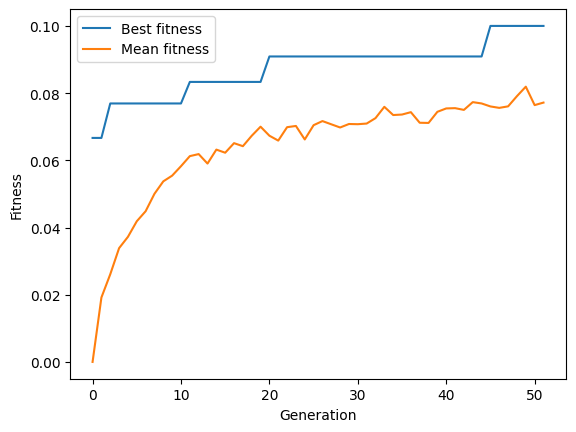

Median execution fitness evolution:


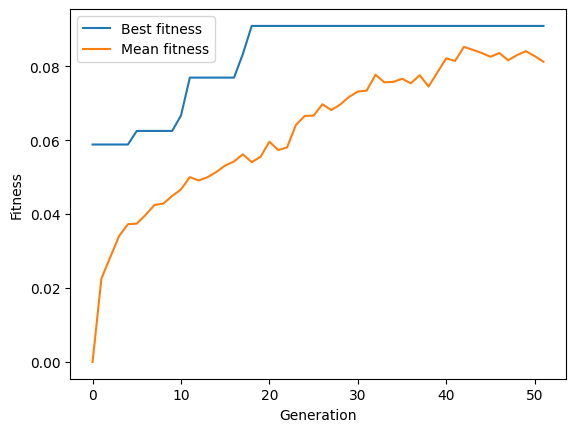

Worst execution fitness evolution:


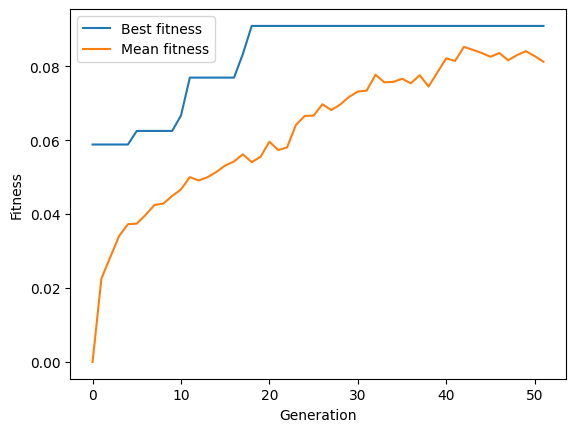

In [ ]:
#dataset5
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment_aprox_final(seeds,dataset5, generate_initial_population_aprox, 50, fitness_timetabling_aprox, calculate_c1_aprox,
                  calculate_p1_aprox, calculate_p2_aprox, calculate_p3_aprox, criterio_de_parada, 50,seleccion_ruleta, one_point_crossover_aprox, 0.7,
                 exchange_mutation, 0.1,replacement, max_gen=50, porcentaje = 0.7)

Running Genetic Algorithm with seed 87684662
Running Genetic Algorithm with seed 87684685
Running Genetic Algorithm with seed 87684708
Running Genetic Algorithm with seed 87684731
Running Genetic Algorithm with seed 87684754
Running Genetic Algorithm with seed 87684777
Running Genetic Algorithm with seed 87684800
Running Genetic Algorithm with seed 87684823
Running Genetic Algorithm with seed 87684846
Running Genetic Algorithm with seed 87684869
Running Genetic Algorithm with seed 87684892
Running Genetic Algorithm with seed 87684915
Running Genetic Algorithm with seed 87684938
Running Genetic Algorithm with seed 87684961
Running Genetic Algorithm with seed 87684984
Running Genetic Algorithm with seed 87685007
Running Genetic Algorithm with seed 87685030
Running Genetic Algorithm with seed 87685053
Running Genetic Algorithm with seed 87685076
Running Genetic Algorithm with seed 87685099
Running Genetic Algorithm with seed 87685122
Running Genetic Algorithm with seed 87685145
Running Ge

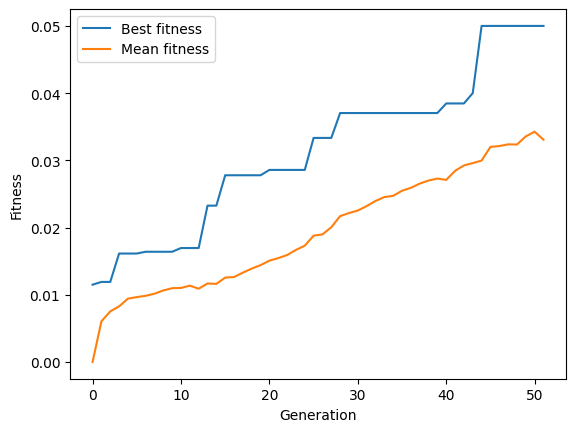

Median execution fitness evolution:


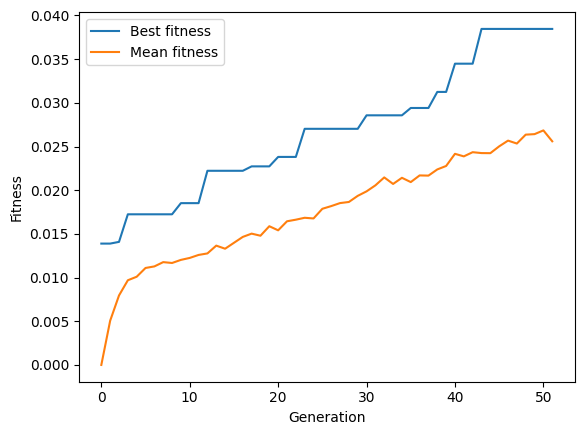

Worst execution fitness evolution:


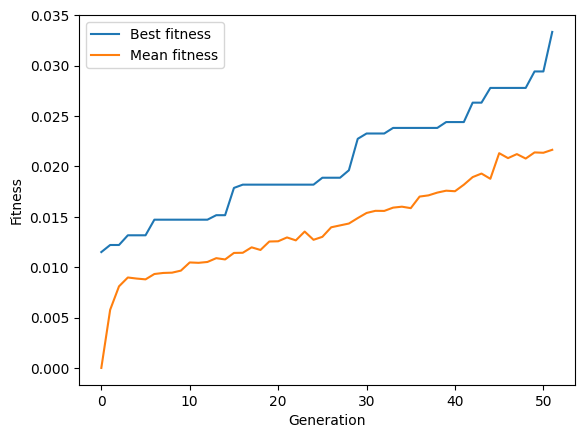

In [ ]:
#dataset6
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_time = launch_experiment_aprox_final(seeds,dataset6, generate_initial_population_aprox, 50, fitness_timetabling_aprox, calculate_c1_aprox,
                  calculate_p1_aprox, calculate_p2_aprox, calculate_p3_aprox, criterio_de_parada, 50,seleccion_ruleta, one_point_crossover_aprox, 0.7,
                 exchange_mutation, 0.1,replacement, max_gen=50, porcentaje = 0.7)

**Resultados de Aproximaciones Propuestas**

|   | Algoritmo          | generaciones                            | tiempo                                      | c1      | p1                                     | p2                                       | p3                                      | Media de BestFitness                        |
|---|--------------------|-----------------------------------------|---------------------------------------------|---------|----------------------------------------|------------------------------------------|-----------------------------------------|---------------------------------------------|
| 1 | aproximacion final | 29.419354838709676 ± 12.074143706141614 | 0.032397900858233054 ± 0.011912146225070006 | 0 ± 0.0 | 0 ± 0.0                                | 0.0967741935483871 ± 0.30053715351876426 | 0 ± 0.0                                 | 0.9516129032258065 ± 0.15026857675938213    |
| 2 | aproximacion final | 50.45161290322581 ± 2.157756700486555   | 0.07920394405241936 ± 0.027451408749385963  | 0 ± 0.0 | 0 ± 0.0                                | 1.2903225806451613 ± 0.5884186937375332  | 0 ± 0.0                                 | 0.47311827956989244 ± 0.16157084327148874   |
| 3 | aproximacion final | 51 ± 0.0                                | 0.08762998734751055 ± 0.02183127594283491   | 0 ± 0.0 | 0 ± 0.0                                | 6 ± 0.0                                  | 0 ± 0.0                                 | 0.14285714285714285 ± 0.0                   |
| 4 | aproximacion final | 51 ± 0.0                                | 0.0742890065716159 ± 0.005191937204523477   | 0 ± 0.0 | 0 ± 0.0                                | 7.193548387096774 ± 0.6010743070375285   | 0 ± 0.0                                 | 0.12269585253456221 ± 0.009179981485739048  |
| 5 | aproximacion final | 51 ± 0.0                                | 0.10537749721157935 ± 0.02912727395061104   | 0 ± 0.0 | 0 ± 0.0                                | 9.838709677419354 ± 0.373878250552983    | 0 ± 0.0                                 | 0.09237536656891496 ± 0.003398893186845301  |
| 6 | aproximacion final | 51 ± 0.0                                | 0.1237869877969065 ± 0.0049186812223020425  | 0 ± 0.0 | 4.774193548387097 ± 2.3764073362866456 | 19.29032258064516 ± 0.7390781820212154   | 0.3870967741935484 ± 0.5584155773160767 | 0.039678927835091686 ± 0.004088631938113732 |
Una tabla por cada aproximación propuesta y una valoración crítica de los resultados.

## Conclusiones


En la representacion final del problema yo he elegido algo diferente. El vector que rrepresenta la organizacion de las asginaturas en el horario es un array de todas las horas disponibles k* M. Aunque aumenta mucho el tamaño del vector a medida que el nunero de horas semanales aumenta, creo que es mcucho mas facil de haer las operaciones con esta representacion del problema, por ejemplo, para calcular las preferencias o condiciones.
Tambien, he quitado la posibilidad de que haya solapamientos entre asignaturas. No creo que aporte nada a encontrar una solucion lo mas proximo a lo optimo.

En la seleccion de los padres he elegido seleccion por ruleta, que al no ser una seleccion equiprobable, si no que cuanto mejor es un individuo mayor probabilidad de que se seleccione, eleva la fitnes de la generacion.

En mutacion, he elegido intercambio de genes. Creo que en este tipo de problemas en los que la resolucion del problema depende mucho de la disposicion del cromosoma, ayuda a la diversidad de las soluciones.

Se puede observar que ha medida que avanzamos en los experimentos y aumenta el tamaño del vector, la solucion es a penas una solcion. Muchos huecos, el numero de dias aumenta.

La propuesta inicial del problema no esta optimizada y es demasiado simple, a medida que se avanzan en las generaciones los individuos buenos se pierden con mucha facilidad y le es mas dificil encontrar soluciones. Hay varios aspectos que lo confirman: a no haber elitismo y ademas que todos los hijos generados sustituyen al cien por cien de la poblacion, como vemos en las graficas de los resultados de los experimentos, a partir del 3er dataset esto provoca que la generacioon se estanque y los resultados sean peores.

